[2022 competition link]('https://adventofcode.com/2022')

--- Day 1: Calorie Counting --- 

Santa's reindeer typically eat regular reindeer food, but they need a lot of magical energy to deliver presents on Christmas. For that, their favorite snack is a special type of star fruit that only grows deep in the jungle. The Elves have brought you on their annual expedition to the grove where the fruit grows.

To supply enough magical energy, the expedition needs to retrieve a minimum of fifty stars by December 25th. Although the Elves assure you that the grove has plenty of fruit, you decide to grab any fruit you see along the way, just in case.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

The jungle must be too overgrown and difficult to navigate in vehicles or access from the air; the Elves' expedition traditionally goes on foot. As your boats approach land, the Elves begin taking inventory of their supplies. One important consideration is food - in particular, the number of Calories each Elf is carrying (your puzzle input).

The Elves take turns writing down the number of Calories contained by the various meals, snacks, rations, etc. that they've brought with them, one item per line. Each Elf separates their own inventory from the previous Elf's inventory (if any) by a blank line.

For example, suppose the Elves finish writing their items' Calories and end up with the following list:

```
1000
2000
3000

4000

5000
6000

7000
8000
9000

10000
```
This list represents the Calories of the food carried by five Elves:

- The first Elf is carrying food with 1000, 2000, and 3000 Calories, a total of 6000 Calories.
- The second Elf is carrying one food item with 4000 Calories.
- The third Elf is carrying food with 5000 and 6000 Calories, a total of 11000 Calories.
- The fourth Elf is carrying food with 7000, 8000, and 9000 Calories, a total of 24000 Calories.
- The fifth Elf is carrying one food item with 10000 Calories.

In case the Elves get hungry and need extra snacks, they need to know which Elf to ask: they'd like to know how many Calories are being carried by the Elf carrying the most Calories. In the example above, this is 24000 (carried by the fourth Elf).

Find the Elf carrying the most Calories. <p style = 'color:yellow;'>How many total Calories is that Elf carrying?</p>

In [2]:
with open('day_1.txt', 'r') as f:
    line = f.read()

In [3]:
max_elf_sum = 0

for elf in line.split('\n\n'):
    elfs_bag = elf.split('\n')
    current_elf_sum = 0
    for x in elfs_bag:
        current_elf_sum+=int(x)
        
        if max_elf_sum < current_elf_sum:
            max_elf_sum = current_elf_sum
            

print(max_elf_sum)

72718


--- Part Two ---

By the time you calculate the answer to the Elves' question, they've already realized that the Elf carrying the most Calories of food might eventually run out of snacks.

To avoid this unacceptable situation, the Elves would instead like to know the total Calories carried by the top three Elves carrying the most Calories. That way, even if one of those Elves runs out of snacks, they still have two backups.

In the example above, the top three Elves are the fourth Elf (with 24000 Calories), then the third Elf (with 11000 Calories), then the fifth Elf (with 10000 Calories). The sum of the Calories carried by these three elves is 45000.

Find the top three Elves carrying the most Calories. <p style = 'color:yellow;'>How many Calories are those Elves carrying in total?</p>

In [4]:
sum_of_elfes = []

for elf in line.split('\n\n'):
    elfs_bag = elf.split('\n')
    current_elf_sum = 0
    for x in elfs_bag:
        current_elf_sum+=int(x)
        
        sum_of_elfes.append(current_elf_sum)
        
sum_of_elfes.sort(reverse=True)
sum(sum_of_elfes[0:3])

213089

--- Day 2: Rock Paper Scissors ---

The Elves begin to set up camp on the beach. To decide whose tent gets to be closest to the snack storage, a giant Rock Paper Scissors tournament is already in progress.

Rock Paper Scissors is a game between two players. Each game contains many rounds; in each round, the players each simultaneously choose one of Rock, Paper, or Scissors using a hand shape. Then, a winner for that round is selected: Rock defeats Scissors, Scissors defeats Paper, and Paper defeats Rock. If both players choose the same shape, the round instead ends in a draw.

Appreciative of your help yesterday, one Elf gives you an encrypted strategy guide (your puzzle input) that they say will be sure to help you win. "The first column is what your opponent is going to play: A for Rock, B for Paper, and C for Scissors. The second column--" Suddenly, the Elf is called away to help with someone's tent.

The second column, you reason, must be what you should play in response: X for Rock, Y for Paper, and Z for Scissors. Winning every time would be suspicious, so the responses must have been carefully chosen.

The winner of the whole tournament is the player with the highest score. Your total score is the sum of your scores for each round. The score for a single round is the score for the shape you selected (1 for Rock, 2 for Paper, and 3 for Scissors) plus the score for the outcome of the round (0 if you lost, 3 if the round was a draw, and 6 if you won).

Since you can't be sure if the Elf is trying to help you or trick you, you should calculate the score you would get if you were to follow the strategy guide.

For example, suppose you were given the following strategy guide:

    A Y
    B X
    C Z

This strategy guide predicts and recommends the following:

In the first round, your opponent will choose Rock (A), and you should choose Paper (Y). This ends in a win for you with a score of 8 (2 because you chose Paper + 6 because you won).
In the second round, your opponent will choose Paper (B), and you should choose Rock (X). This ends in a loss for you with a score of 1 (1 + 0).
The third round is a draw with both players choosing Scissors, giving you a score of 3 + 3 = 6.
In this example, if you were to follow the strategy guide, you would get a total score of 15 (8 + 1 + 6).

<p style = 'color:yellow;'>What would your total score be if everything goes exactly according to your strategy guide?</p>

In [5]:
scores_elf = {'Y': 2, 'X': 1, 'Z': 3}

scores_game = {'Lose':0, 'Draw':3, 'Win':6}

lose_pairs = {
    "Rock": "Scissors",
    "Scissors": "Paper",
    "Paper": "Rock"
}

elf_1_dict = {
    'A': 'Rock',
    'B': 'Paper',
    'C': 'Scissors'}

elf_2_dict = {
    'X': 'Rock',
    'Y': 'Paper',
    'Z': 'Scissors'}

In [6]:
total_counter = 0

with open("day_2.txt", "r") as file1:
    # итерация по строкам
    for line in file1:

        elf_hand = 0
        result = ''
        
        elf_1, elf_2 = line.replace('\n', '').split(' ')
                        
        if elf_1_dict[elf_1] == elf_2_dict[elf_2]:
            result = 'Draw'
            elf_hand = scores_elf[elf_2]
        
        else:
            
            for i, j in lose_pairs.items():
                
                if elf_1_dict[elf_1] == i and elf_2_dict[elf_2] == j:
                    result = 'Lose'
                    elf_hand = scores_elf[elf_2]
                    
                elif elf_2_dict[elf_2] == i and elf_1_dict[elf_1] == j:
                    result = 'Win'
                    elf_hand = scores_elf[elf_2]
                    
        total_counter+=scores_game[result]
        total_counter+=elf_hand
        
total_counter

11063

--- Part Two ---

The Elf finishes helping with the tent and sneaks back over to you. "Anyway, the second column says how the round needs to end: X means you need to lose, Y means you need to end the round in a draw, and Z means you need to win. Good luck!"

The total score is still calculated in the same way, but now you need to figure out what shape to choose so the round ends as indicated. The example above now goes like this:

In the first round, your opponent will choose Rock (A), and you need the round to end in a draw (Y), so you also choose Rock. This gives you a score of 1 + 3 = 4.
In the second round, your opponent will choose Paper (B), and you choose Rock so you lose (X) with a score of 1 + 0 = 1.
In the third round, you will defeat your opponent's Scissors with Rock for a score of 1 + 6 = 7.
Now that you're correctly decrypting the ultra top secret strategy guide, you would get a total score of 12.

<p style = 'color:yellow;'>Following the Elf's instructions for the second column, what would your total score be if everything goes exactly according to your strategy guide?</p>

In [7]:
result_list = {'Y': 'Draw', 'X': 'Lose', 'Z': 'Win'}
scores_elf_result = {'B': 2, 'A': 1, 'C': 3}
scores_elf_hand = {'Rock': 1, 'Paper': 2, 'Scissors': 3}

scores_game = {'Lose':0, 'Draw':3, 'Win':6}


elf_1_dict = {
    'A': 'Rock',
    'B': 'Paper',
    'C': 'Scissors'}


lose_pairs = {
    "Rock": "Scissors",
    "Scissors": "Paper",
    "Paper": "Rock"
}


win_pairs = {
    "Rock": "Paper",
    "Scissors": "Rock",
    "Paper": "Scissors"
}

total_counter = 0


with open("day_2.txt", "r") as file1:
    
    lines = file1.readlines()
    # итерация по строкам
    for line in lines:

        elf_hand = 0
        result = ''
        
        elf_1, result_code = line.split(' ')
        
        if result_list[result_code] == 'Lose':
                
            result = 'Lose'
            elf_2 = lose_pairs[elf_1_dict[elf_1]]
            elf_hand = scores_elf_hand[elf_2]
                
        elif result_list[result_code] == 'Win':
            
            result = 'Win'
            elf_2 = win_pairs[elf_1_dict[elf_1]]
            elf_hand = scores_elf_hand[elf_2]
                                
        else:
            
            result = 'Draw'
            elf_2 = elf_1
            elf_hand = scores_elf_result[elf_2]
                                                
        total_counter+=scores_game[result]
        total_counter+=elf_hand

        
total_counter

KeyError: 'X\n'

--- Day 3: Rucksack Reorganization ---

One Elf has the important job of loading all of the rucksacks with supplies for the jungle journey. Unfortunately, that Elf didn't quite follow the packing instructions, and so a few items now need to be rearranged.

Each rucksack has two large compartments. All items of a given type are meant to go into exactly one of the two compartments. The Elf that did the packing failed to follow this rule for exactly one item type per rucksack.

The Elves have made a list of all of the items currently in each rucksack (your puzzle input), but they need your help finding the errors. Every item type is identified by a single lowercase or uppercase letter (that is, a and A refer to different types of items).

The list of items for each rucksack is given as characters all on a single line. A given rucksack always has the same number of items in each of its two compartments, so the first half of the characters represent items in the first compartment, while the second half of the characters represent items in the second compartment.

For example, suppose you have the following list of contents from six rucksacks:

`vJrwpWtwJgWrhcsFMMfFFhFp`  
`jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL`  
`PmmdzqPrVvPwwTWBwg`  
`wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn`  
`ttgJtRGJQctTZtZT`  
`CrZsJsPPZsGzwwsLwLmpwMDw`

- The first rucksack contains the items vJrwpWtwJgWrhcsFMMfFFhFp, which means its first compartment contains the items vJrwpWtwJgWr, while the second compartment contains the items hcsFMMfFFhFp. The only item type that appears in both compartments is lowercase p.
- The second rucksack's compartments contain jqHRNqRjqzjGDLGL and rsFMfFZSrLrFZsSL. The only item type that appears in both compartments is uppercase L.
- The third rucksack's compartments contain PmmdzqPrV and vPwwTWBwg; the only common item type is uppercase P.
- The fourth rucksack's compartments only share item type v.
- The fifth rucksack's compartments only share item type t.
- The sixth rucksack's compartments only share item type s.
  
To help prioritize item rearrangement, every item type can be converted to a priority:

- Lowercase item types a through z have priorities 1 through 26.
- Uppercase item types A through Z have priorities 27 through 52.

In the above example, the priority of the item type that appears in both compartments of each rucksack is 16 (p), 38 (L), 42 (P), 22 (v), 20 (t), and 19 (s); the sum of these is 157.

Find the item type that appears in both compartments of each rucksack. <p style = 'color:yellow;'>What is the sum of the priorities of those item types?</p>

In [ ]:
import string

# string.ascii_letters

In [ ]:
def magic_elf_function(string_from_file):
    string_len = int(len(string_from_file)/2)
    
    first_part = string_from_file[:string_len]
    second_part = string_from_file[string_len:]
    
    for i in first_part:
        if i in second_part:
            return string.ascii_letters.index(i)+1

In [ ]:
total_counter = 0

with open("day_3.txt", "r") as file1:
    lines = file1.readlines()
    # итерация по строкам
    for line in lines:
        count = magic_elf_function(line)
        total_counter+= count
        
        
total_counter

8233

--- Part Two ---

As you finish identifying the misplaced items, the Elves come to you with another issue.

For safety, the Elves are divided into groups of three. Every Elf carries a badge that identifies their group. For efficiency, within each group of three Elves, the badge is the only item type carried by all three Elves. That is, if a group's badge is item type B, then all three Elves will have item type B somewhere in their rucksack, and at most two of the Elves will be carrying any other item type.

The problem is that someone forgot to put this year's updated authenticity sticker on the badges. All of the badges need to be pulled out of the rucksacks so the new authenticity stickers can be attached.

Additionally, nobody wrote down which item type corresponds to each group's badges. The only way to tell which item type is the right one is by finding the one item type that is common between all three Elves in each group.

Every set of three lines in your list corresponds to a single group, but each group can have a different badge item type. So, in the above example, the first group's rucksacks are the first three lines:

    vJrwpWtwJgWrhcsFMMfFFhFp
    jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL
    PmmdzqPrVvPwwTWBwg

And the second group's rucksacks are the next three lines:

    wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn
    ttgJtRGJQctTZtZT
    CrZsJsPPZsGzwwsLwLmpwMDw

In the first group, the only item type that appears in all three rucksacks is lowercase r; this must be their badges. In the second group, their badge item type must be Z.

Priorities for these items must still be found to organize the sticker attachment efforts: here, they are 18 (r) for the first group and 52 (Z) for the second group. The sum of these is 70.

Find the item type that corresponds to the badges of each three-Elf group. <p style = 'color:yellow;'>What is the sum of the priorities of those item types?</p>

In [ ]:
with open("day_3.txt", "r") as file1:
    lines = file1.readlines()
    
    lines_list = [line.replace('\n', '') for line in lines]

In [ ]:
from itertools import zip_longest

groups = list(zip_longest(*[iter(lines_list)]*3, fillvalue=''))

In [ ]:
total_points = 0

for list_3_string in groups:
    list_3_string = list(list_3_string)
    min_element = ''
    
    for list_element in list_3_string:
        if len(min_element) == 0 and len(list_element)!=0:
            min_element = list_element
        elif len(list_element)!=0 and len(min_element)>len(list_element):
            min_element = list_element
    
    list_3_string.remove(min_element)
    
    min_element = set(min_element)
    
    for char in min_element:
        if char in list_3_string[0] and char in list_3_string[1]:
                        
            letter_point = string.ascii_letters.index(char)+1
            
            total_points += letter_point
            
total_points

2821

--- Day 4: Camp Cleanup ---

Space needs to be cleared before the last supplies can be unloaded from the ships, and so several Elves have been assigned the job of cleaning up sections of the camp. Every section has a unique ID number, and each Elf is assigned a range of section IDs.

However, as some of the Elves compare their section assignments with each other, they've noticed that many of the assignments overlap. To try to quickly find overlaps and reduce duplicated effort, the Elves pair up and make a big list of the section assignments for each pair (your puzzle input).

For example, consider the following list of section assignment pairs:

    2-4,6-8
    2-3,4-5
    5-7,7-9
    2-8,3-7
    6-6,4-6
    2-6,4-8

For the first few pairs, this list means:

- Within the first pair of Elves, the first Elf was assigned sections 2-4 (sections 2, 3, and 4), while the second Elf was assigned sections 6-8 (sections 6, 7, 8).
- The Elves in the second pair were each assigned two sections.
- The Elves in the third pair were each assigned three sections: one got sections 5, 6, and 7, while the other also got 7, plus 8 and 9.

This example list uses single-digit section IDs to make it easier to draw; your actual list might contain larger numbers. Visually, these pairs of section assignments look like this:

    .234.....  2-4
    .....678.  6-8

    .23......  2-3
    ...45....  4-5

    ....567..  5-7
    ......789  7-9

    .2345678.  2-8
    ..34567..  3-7

    .....6...  6-6
    ...456...  4-6

    .23456...  2-6
    ...45678.  4-8

Some of the pairs have noticed that one of their assignments fully contains the other. For example, 2-8 fully contains 3-7, and 6-6 is fully contained by 4-6. In pairs where one assignment fully contains the other, one Elf in the pair would be exclusively cleaning sections their partner will already be cleaning, so these seem like the most in need of reconsideration. In this example, there are 2 such pairs.

<p style = 'color:yellow;'>In how many assignment pairs does one range fully contain the other?</p>

In [ ]:
counter = 0

with open("day_4.txt", "r") as file1:
    lines = file1.readlines()
    
    for element in lines:
        list_elem= element.replace('\n', '').split(',')
        
        a,b = list_elem[0].split('-')
        a,b = int(a), int(b)
        
        
        c,d = list_elem[1].split('-')
        c,d = int(c), int(d)
        
        if (a <= c and b >= d) or (c <= a and d >= b):
            counter+=1


counter

483

--- Part Two ---

It seems like there is still quite a bit of duplicate work planned. Instead, the Elves would like to know the number of pairs that overlap at all.

In the above example, the first two pairs (2-4,6-8 and 2-3,4-5) don't overlap, while the remaining four pairs (5-7,7-9, 2-8,3-7, 6-6,4-6, and 2-6,4-8) do overlap:

- 5-7,7-9 overlaps in a single section, 7.
- 2-8,3-7 overlaps all of the sections 3 through 7.
- 6-6,4-6 overlaps in a single section, 6.
- 2-6,4-8 overlaps in sections 4, 5, and 6.
  
So, in this example, the number of overlapping assignment pairs is 4.

<p style = 'color:yellow;'>In how many assignment pairs do the ranges overlap?</p>



In [ ]:
counter = 0

with open("day_4.txt", "r") as file1:
    lines = file1.readlines()
    
    for element in lines:
        list_elem= element.replace('\n', '').split(',')
        
        a,b = list_elem[0].split('-')
        a,b = int(a), int(b)
        
        
        c,d = list_elem[1].split('-')
        c,d = int(c), int(d)
        
        x = range(a,b+1)
        y = range(c,d+1)
        xs = set(x)
        
        if len(xs.intersection(y)) !=0:    
            counter+=1


counter

874

--- Day 5: Supply Stacks ---

The expedition can depart as soon as the final supplies have been unloaded from the ships. Supplies are stored in stacks of marked crates, but because the needed supplies are buried under many other crates, the crates need to be rearranged.

The ship has a giant cargo crane capable of moving crates between stacks. To ensure none of the crates get crushed or fall over, the crane operator will rearrange them in a series of carefully-planned steps. After the crates are rearranged, the desired crates will be at the top of each stack.

The Elves don't want to interrupt the crane operator during this delicate procedure, but they forgot to ask her which crate will end up where, and they want to be ready to unload them as soon as possible so they can embark.

They do, however, have a drawing of the starting stacks of crates and the rearrangement procedure (your puzzle input). For example:

```
    [D]
[N] [C]
[Z] [M] [P]
 1   2   3 
```

```
move 1 from 2 to 1
move 3 from 1 to 3
move 2 from 2 to 1
move 1 from 1 to 2
```

In this example, there are three stacks of crates. Stack 1 contains two crates: crate Z is on the bottom, and crate N is on top. Stack 2 contains three crates; from bottom to top, they are crates M, C, and D. Finally, stack 3 contains a single crate, P.

Then, the rearrangement procedure is given. In each step of the procedure, a quantity of crates is moved from one stack to a different stack. In the first step of the above rearrangement procedure, one crate is moved from stack 2 to stack 1, resulting in this configuration:

```
[D]
[N] [C]
[Z] [M] [P]
 1   2   3
```

In the second step, three crates are moved from stack 1 to stack 3. Crates are moved one at a time, so the first crate to be moved (D) ends up below the second and third crates:

```
        [Z]
        [N]
    [C] [D]
    [M] [P]
 1   2   3
```

Then, both crates are moved from stack 2 to stack 1. Again, because crates are moved one at a time, crate C ends up below crate M:

```
        [Z]
        [N]
[M]     [D]
[C]     [P]
 1   2   3
```

Finally, one crate is moved from stack 1 to stack 2:

```
        [Z]
        [N]
        [D]
[C] [M] [P]
 1   2   3
```

The Elves just need to know which crate will end up on top of each stack; in this example, the top crates are C in stack 1, M in stack 2, and Z in stack 3, so you should combine these together and give the Elves the message CMZ.

<p style = 'color:yellow;'>After the rearrangement procedure completes, what crate ends up on top of each stack?</p>

```
[G]                 [D] [R]        
[W]         [V]     [C] [T] [M]    
[L]         [P] [Z] [Q] [F] [V]    
[J]         [S] [D] [J] [M] [T] [V]
[B]     [M] [H] [L] [Z] [J] [B] [S]
[R] [C] [T] [C] [T] [R] [D] [R] [D]
[T] [W] [Z] [T] [P] [B] [B] [H] [P]
[D] [S] [R] [D] [G] [F] [S] [L] [Q]
```

In [ ]:
with open("day_5.txt", "r") as file1:
    lines = file1.readlines()[10:]

In [ ]:
stack = [["G", "W", "L", "J", "B", "R", "T", "D"],
         ["C", "W", "S"],
         ["M", "T", "Z", "R"],
         ["V", "P", "S", "H", "C", "T", "D"],
         ["Z", "D", "L", "T", "P", "G"],
         ["D", "C", "Q", "J", "Z", "R", "B", "F"],
         ["R", "T", "F", "M", "J", "D", "B", "S"],
         ["M", "V", "T", "B", "R", "H", "L"],
         ["V", "S", "D", "P", "Q"],
         ]

for line in lines:
    
    line = line.split(' ')
    
    crates_count = int(line[1])
    column_number_from = int(line[3])-1
    column_number_to = int(line[5].replace('\n', ''))-1
        
    crates_list = stack[column_number_from][0:crates_count]
    
    stack[column_number_from] = stack[column_number_from][crates_count:]
    stack[column_number_to] = crates_list[::-1] + stack[column_number_to]
    # stack[column_number_to] = stack[column_number_to]
    

for i in stack:
    print(i[0], sep=" ", end="")

SHMSDGZVC

--- Part Two ---

As you watch the crane operator expertly rearrange the crates, you notice the process isn't following your prediction.

Some mud was covering the writing on the side of the crane, and you quickly wipe it away. The crane isn't a CrateMover 9000 - it's a CrateMover 9001.

The CrateMover 9001 is notable for many new and exciting features: air conditioning, leather seats, an extra cup holder, and the ability to pick up and move multiple crates at once.

Again considering the example above, the crates begin in the same configuration:

```
    [D]    
[N] [C]    
[Z] [M] [P]
 1   2   3 
```

Moving a single crate from stack 2 to stack 1 behaves the same as before:

```
[D]        
[N] [C]    
[Z] [M] [P]
 1   2   3 
```

However, the action of moving three crates from stack 1 to stack 3 means that those three moved crates stay in the same order, resulting in this new configuration:

```
        [D]
        [N]
    [C] [Z]
    [M] [P]
 1   2   3
```

Next, as both crates are moved from stack 2 to stack 1, they retain their order as well:

```
        [D]
        [N]
[C]     [Z]
[M]     [P]
 1   2   3
```

Finally, a single crate is still moved from stack 1 to stack 2, but now it's crate C that gets moved:

```
        [D]
        [N]
        [Z]
[M] [C] [P]
 1   2   3
```

In this example, the CrateMover 9001 has put the crates in a totally different order: MCD.

<p style = 'color:yellow;'>Before the rearrangement process finishes, update your simulation so that the Elves know where they should stand to be ready to unload the final supplies. After the rearrangement procedure completes, what crate ends up on top of each stack?</p>

In [ ]:
stack = [["G", "W", "L", "J", "B", "R", "T", "D"],
         ["C", "W", "S"],
         ["M", "T", "Z", "R"],
         ["V", "P", "S", "H", "C", "T", "D"],
         ["Z", "D", "L", "T", "P", "G"],
         ["D", "C", "Q", "J", "Z", "R", "B", "F"],
         ["R", "T", "F", "M", "J", "D", "B", "S"],
         ["M", "V", "T", "B", "R", "H", "L"],
         ["V", "S", "D", "P", "Q"],
         ]

for line in lines:
    
    line = line.split(' ')
    
    crates_count = int(line[1])
    column_number_from = int(line[3])-1
    column_number_to = int(line[5].replace('\n', ''))-1
        
    crates_list = stack[column_number_from][0:crates_count]
    
    stack[column_number_from] = stack[column_number_from][crates_count:]
    stack[column_number_to] = crates_list + stack[column_number_to]
    # stack[column_number_to] = stack[column_number_to]
    

for i in stack:
    print(i[0], sep=" ", end="")

VRZGHDFBQ

--- Day 6: Tuning Trouble ---

The preparations are finally complete; you and the Elves leave camp on foot and begin to make your way toward the star fruit grove.

As you move through the dense undergrowth, one of the Elves gives you a handheld device. He says that it has many fancy features, but the most important one to set up right now is the communication system.

However, because he's heard you have significant experience dealing with signal-based systems, he convinced the other Elves that it would be okay to give you their one malfunctioning device - surely you'll have no problem fixing it.

As if inspired by comedic timing, the device emits a few colorful sparks.

To be able to communicate with the Elves, the device needs to lock on to their signal. The signal is a series of seemingly-random characters that the device receives one at a time.

To fix the communication system, you need to add a subroutine to the device that detects a start-of-packet marker in the datastream. In the protocol being used by the Elves, the start of a packet is indicated by a sequence of four characters that are all different.

The device will send your subroutine a datastream buffer (your puzzle input); your subroutine needs to identify the first position where the four most recently received characters were all different. Specifically, it needs to report the number of characters from the beginning of the buffer to the end of the first such four-character marker.

For example, suppose you receive the following datastream buffer:

`mjqjpqmgbljsphdztnvjfqwrcgsmlb`

After the first three characters (mjq) have been received, there haven't been enough characters received yet to find the marker. The first time a marker could occur is after the fourth character is received, making the most recent four characters mjqj. Because j is repeated, this isn't a marker.

The first time a marker appears is after the seventh character arrives. Once it does, the last four characters received are jpqm, which are all different. In this case, your subroutine should report the value 7, because the first start-of-packet marker is complete after 7 characters have been processed.

Here are a few more examples:

- `bvwbjplbgvbhsrlpgdmjqwftvncz`: first marker after character 5
- `nppdvjthqldpwncqszvftbrmjlhg`: first marker after character 6
- `nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg`: first marker after character 10
- `zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw`: first marker after character 11

<p style = 'color:yellow;'>How many characters need to be processed before the first start-of-packet marker is detected?</p>

In [ ]:
with open("day_6.txt", "r") as file1:
    lines = file1.readline()

In [ ]:
def find_marker(elf_str, window_wide):
    for i in range(len(elf_str)-window_wide):
        cur_window = elf_str[i:i+window_wide]
        
        if len(set(cur_window))== window_wide:
            return (i+window_wide)
        

print(find_marker(lines, 4))

1892


--- Part Two ---

Your device's communication system is correctly detecting packets, but still isn't working. It looks like it also needs to look for messages.

A start-of-message marker is just like a start-of-packet marker, except it consists of 14 distinct characters rather than 4.

Here are the first positions of start-of-message markers for all of the above examples:

- `mjqjpqmgbljsphdztnvjfqwrcgsmlb`: first marker after character 19
- `bvwbjplbgvbhsrlpgdmjqwftvncz`: first marker after character 23
- `nppdvjthqldpwncqszvftbrmjlhg`: first marker after character 23
- `nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg`: first marker after character 29
- `zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw`: first marker after character 26

<p style = 'color:yellow;'>How many characters need to be processed before the first start-of-message marker is detected?</p>

In [ ]:
print(find_marker(lines, 14))

2313


--- Day 7: No Space Left On Device ---

You can hear birds chirping and raindrops hitting leaves as the expedition proceeds. Occasionally, you can even hear much louder sounds in the distance; how big do the animals get out here, anyway?

The device the Elves gave you has problems with more than just its communication system. You try to run a system update:

```
$ system-update --please --pretty-please-with-sugar-on-top
Error: No space left on device
```

Perhaps you can delete some files to make space for the update?

You browse around the filesystem to assess the situation and save the resulting terminal output (your puzzle input). For example:

```
$ cd /
$ ls
dir a
14848514 b.txt
8504156 c.dat
dir d
$ cd a
$ ls
dir e
29116 f
2557 g
62596 h.lst
$ cd e
$ ls
584 i
$ cd ..
$ cd ..
$ cd d
$ ls
4060174 j
8033020 d.log
5626152 d.ext
7214296 k
```

The filesystem consists of a tree of files (plain data) and directories (which can contain other directories or files). The outermost directory is called /. You can navigate around the filesystem, moving into or out of directories and listing the contents of the directory you're currently in.

Within the terminal output, lines that begin with $ are commands you executed, very much like some modern computers:

- `cd` means change directory. This changes which directory is the current directory, but the specific result depends on the argument:
- `cd x` moves in one level: it looks in the current directory for the directory named x and makes it the current directory.
- `cd ..` moves out one level: it finds the directory that contains the current directory, then makes that directory the current directory.
- `cd /` switches the current directory to the outermost directory, `/`.
- `ls` means list. It prints out all of the files and directories immediately contained by the current directory:
    - `123 abc` means that the current directory contains a file named `abc` with size `123`.
    - `dir xyz` means that the current directory contains a directory named `xyz`.
Given the commands and output in the example above, you can determine that the filesystem looks visually like this:

```
- / (dir)
  - a (dir)
    - e (dir)
      - i (file, size=584)
    - f (file, size=29116)
    - g (file, size=2557)
    - h.lst (file, size=62596)
  - b.txt (file, size=14848514)
  - c.dat (file, size=8504156)
  - d (dir)
    - j (file, size=4060174)
    - d.log (file, size=8033020)
    - d.ext (file, size=5626152)
    - k (file, size=7214296)
```

Here, there are four directories: `/` (the outermost directory), `a` and `d` (which are in `/`), and `e` (which is in `a`). These directories also contain files of various sizes.

Since the disk is full, your first step should probably be to find directories that are good candidates for deletion. To do this, you need to determine the total size of each directory. The total size of a directory is the sum of the sizes of the files it contains, directly or indirectly. (Directories themselves do not count as having any intrinsic size.)

The total sizes of the directories above can be found as follows:

- The total size of directory `e` is 584 because it contains a single file `i` of size 584 and no other directories.
- The directory `a` has total size 94853 because it contains files `f` (size 29116), `g` (size 2557), and `h.lst` (size 62596), plus file `i` indirectly (`a` contains `e` which contains `i`).
- Directory `d` has total size 24933642.
- As the outermost directory, `/` contains every file. Its total size is 48381165, the sum of the size of every file.

To begin, find all of the directories with a total size of at most 100000, then calculate the sum of their total sizes. In the example above, these directories are `a` and `e`; the sum of their total sizes is 95437 (94853 + 584). (As in this example, this process can count files more than once!)

<p style = 'color:yellow;'>Find all of the directories with a total size of at most 100000. What is the sum of the total sizes of those directories?</p>

In [ ]:
with open("day_7.txt", "r") as file1:
    lines = [line.strip() for line in file1.readlines()]

In [ ]:
path = dict()
sums = dict()

current_path = []

for line in lines:
    line = line.split(' ')
    
    if line[1] == "cd":
        if line[2] == "..":
            current_path.pop()
        else:
            current_path.append(line[2])
            path["".join(current_path)] = []
            sums["".join(current_path)] = 0
    elif line[1] == "ls":
        continue
    elif line[0] == "dir":
        path["".join(current_path)].append("".join(current_path) + line[1])
    else:
        sums["".join(current_path)] += int(line[0])

total_size = dict()
for i in path:
    total_size[i] = 0

def searcher(i):
    if len(path[i]) > 0:
        for j in path[i]:
            searcher(j)  
    cnt.append(sums[i])
    return cnt

for i in path:
    cnt = list()
    cnt = searcher(i)
    total_size[i] += sum(cnt)

result = 0
for i in total_size:
    if total_size[i] <= 100000:
        result += total_size[i]
        

print(result)


1543140


In [ ]:
used_space = sum(list(sums.values()))
disc_space = 70000000
unused_space = 30000000
del_val = disc_space

for i in total_size:
    if (used_space - total_size[i]) <= (disc_space - unused_space) and total_size[i] < del_val:
        del_val = total_size[i]

print(del_val)

1117448


--- Day 8: Treetop Tree House ---

The expedition comes across a peculiar patch of tall trees all planted carefully in a grid. The Elves explain that a previous expedition planted these trees as a reforestation effort. Now, they're curious if this would be a good location for a tree house.

First, determine whether there is enough tree cover here to keep a tree house hidden. To do this, you need to count the number of trees that are visible from outside the grid when looking directly along a row or column.

The Elves have already launched a quadcopter to generate a map with the height of each tree (your puzzle input). For example:

```
30373
25512
65332
33549
35390
```

Each tree is represented as a single digit whose value is its height, where 0 is the shortest and 9 is the tallest.

A tree is visible if all of the other trees between it and an edge of the grid are shorter than it. Only consider trees in the same row or column; that is, only look up, down, left, or right from any given tree.

All of the trees around the edge of the grid are visible - since they are already on the edge, there are no trees to block the view. In this example, that only leaves the interior nine trees to consider:

- The top-left 5 is visible from the left and top. (It isn't visible from the right or bottom since other trees of height 5 are in the way.)
- The top-middle 5 is visible from the top and right.
- The top-right 1 is not visible from any direction; for it to be visible, there would need to only be trees of height 0 between it and an edge.
- The left-middle 5 is visible, but only from the right.
- The center 3 is not visible from any direction; for it to be visible, there would need to be only trees of at most height 2 between it and an edge.
- The right-middle 3 is visible from the right.
- In the bottom row, the middle 5 is visible, but the 3 and 4 are not.

With 16 trees visible on the edge and another 5 visible in the interior, a total of 21 trees are visible in this arrangement.

<p style = 'color:yellow;'>Consider your map; how many trees are visible from outside the grid?</p>

In [ ]:
with open("day_8.txt") as f:
    lines = f.readlines()

lines = [i.strip() for i in lines]
forest_grid = [[int(j) for j in i] for i in lines]

# forest_grid

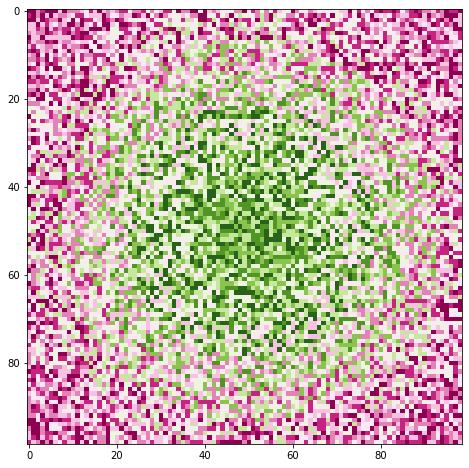

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(forest_grid, cmap='PiYG', interpolation='nearest')
plt.show()

In [ ]:
total = 0
max_score = 0


for i in range(len(forest_grid)):
    for j in range(len(forest_grid[0])):
        col = [forest_grid[x][j] for x in range(len(forest_grid))]
        l,r,u,d = list(reversed(forest_grid[i][:j])), forest_grid[i][j+1:], list(reversed(col[:i])), col[i+1:]
        if i == 0 or j == 0 or i == len(forest_grid) -1 or j == len(forest_grid[0])-1:
            total += 1
        else:
            left,right = max(l),max(r)
            up,down = max(u),max(d)
            if forest_grid[i][j] > min(up,down,left,right):
                total += 1
        cum_score = 1
        for path in (l,r,u,d):
            score = 1
            for t in range(len(path)):
                if path[t] < forest_grid[i][j]:
                    score += 1
                else:
                    break
                if t == len(path) -1:
                    score -= 1
            cum_score *= score
        if cum_score > max_score:
            max_score = cum_score



answer_one = total
answer_two = max_score


print("p1:", answer_one)
print("p2:", answer_two)

p1: 1698
p2: 672280


--- Day 9: Rope Bridge ---

This rope bridge creaks as you walk along it. You aren't sure how old it is, or whether it can even support your weight.

It seems to support the Elves just fine, though. The bridge spans a gorge which was carved out by the massive river far below you.

You step carefully; as you do, the ropes stretch and twist. You decide to distract yourself by modeling rope physics; maybe you can even figure out where not to step.

Consider a rope with a knot at each end; these knots mark the head and the tail of the rope. If the head moves far enough away from the tail, the tail is pulled toward the head.

Due to nebulous reasoning involving Planck lengths, you should be able to model the positions of the knots on a two-dimensional grid. Then, by following a hypothetical series of motions (your puzzle input) for the head, you can determine how the tail will move.

Due to the aforementioned Planck lengths, the rope must be quite short; in fact, the head (H) and tail (T) must always be touching (diagonally adjacent and even overlapping both count as touching):

```
....
.TH.
....

....
.H..
..T.
....

...
.H. (H covers T)
...
```

If the head is ever two steps directly up, down, left, or right from the tail, the tail must also move one step in that direction so it remains close enough:

```
.....    .....    .....
.TH.. -> .T.H. -> ..TH.
.....    .....    .....

...    ...    ...
.T.    .T.    ...
.H. -> ... -> .T.
...    .H.    .H.
...    ...    ...
```

Otherwise, if the head and tail aren't touching and aren't in the same row or column, the tail always moves one step diagonally to keep up:

```
.....    .....    .....
.....    ..H..    ..H..
..H.. -> ..... -> ..T..
.T...    .T...    .....
.....    .....    .....

.....    .....    .....
.....    .....    .....
..H.. -> ...H. -> ..TH.
.T...    .T...    .....
.....    .....    .....
```

You just need to work out where the tail goes as the head follows a series of motions. Assume the head and the tail both start at the same position, overlapping.

For example:

```
R 4
U 4
L 3
D 1
R 4
D 1
L 5
R 2
```

This series of motions moves the head right four steps, then up four steps, then left three steps, then down one step, and so on. After each step, you'll need to update the position of the tail if the step means the head is no longer adjacent to the tail. Visually, these motions occur as follows (s marks the starting position as a reference point):

```
== Initial State ==

......
......
......
......
H.....  (H covers T, s)

== R 4 ==

......
......
......
......
TH....  (T covers s)

......
......
......
......
sTH...

......
......
......
......
s.TH..

......
......
......
......
s..TH.

== U 4 ==

......
......
......
....H.
s..T..

......
......
....H.
....T.
s.....

......
....H.
....T.
......
s.....

....H.
....T.
......
......
s.....

== L 3 ==

...H..
....T.
......
......
s.....

..HT..
......
......
......
s.....

.HT...
......
......
......
s.....

== D 1 ==

..T...
.H....
......
......
s.....

== R 4 ==

..T...
..H...
......
......
s.....

..T...
...H..
......
......
s.....

......
...TH.
......
......
s.....

......
....TH
......
......
s.....

== D 1 ==

......
....T.
.....H
......
s.....

== L 5 ==

......
....T.
....H.
......
s.....

......
....T.
...H..
......
s.....

......
......
..HT..
......
s.....

......
......
.HT...
......
s.....

......
......
HT....
......
s.....

== R 2 ==

......
......
.H....  (H covers T)
......
s.....

......
......
.TH...
......
s.....
```

After simulating the rope, you can count up all of the positions the tail visited at least once. In this diagram, s again marks the starting position (which the tail also visited) and # marks other positions the tail visited:

```
..##..
...##.
.####.
....#.
s###..
```

So, there are 13 positions the tail visited at least once.

Simulate your complete hypothetical series of motions. <p style = 'color:yellow;'>How many positions does the tail of the rope visit at least once?</p>

In [ ]:
from collections import defaultdict

with open('day_9.txt') as f:
    lines = [ [ l.strip().split(" ")[0], int(l.strip().split(" ")[1]) ] for l in f.readlines() ]

In [ ]:
directions = {"R": (+1,0), "L":(-1,0), "U":(0,+1), "D":(0,-1)}

def move_head(c,m):
    return tuple([ i+j for i,j in zip(c,directions[m]) ])

def move_tail(head, head_prev, tail):
    # same position, don't move
    if head==tail: 
        return tail
    xH,yH = head
    xT,yT = tail
    dx = abs(xH-xT)
    dy = abs(yH-yT)
    if dx<=1 and dy<=1: # adiacent, don't move
        return tail
    else:
        if dx<=1 and dy==2:
            return (xH,yH-(yH-yT)//dy)
        elif dx==2 and dy<=1:
            return (xH-(xH-xT)//dx,yH)
        elif dx==2 and dy==2:
            return (xH-(xH-xT)//dx,yH-(yH-yT)//dy)


head = (0,0)
tail = (0,0)
Ht = defaultdict(int)
Tt = defaultdict(int)
Ht[head] = 1
Tt[head] = 1
for d,n in lines:
    for _ in range(n):
        # move Head
        head_prev = head
        head = move_head(head_prev, d)
        Ht[head] += 1
        # move Tail
        tail = move_tail(head, head_prev, tail)
        Tt[tail] += 1

print(len(Tt.keys()))

5619


--- Part Two ---

A rope snaps! Suddenly, the river is getting a lot closer than you remember. The bridge is still there, but some of the ropes that broke are now whipping toward you as you fall through the air!

The ropes are moving too quickly to grab; you only have a few seconds to choose how to arch your body to avoid being hit. Fortunately, your simulation can be extended to support longer ropes.

Rather than two knots, you now must simulate a rope consisting of ten knots. One knot is still the head of the rope and moves according to the series of motions. Each knot further down the rope follows the knot in front of it using the same rules as before.

Using the same series of motions as the above example, but with the knots marked H, 1, 2, ..., 9, the motions now occur as follows:

```
== Initial State ==

......
......
......
......
H.....  (H covers 1, 2, 3, 4, 5, 6, 7, 8, 9, s)

== R 4 ==

......
......
......
......
1H....  (1 covers 2, 3, 4, 5, 6, 7, 8, 9, s)

......
......
......
......
21H...  (2 covers 3, 4, 5, 6, 7, 8, 9, s)

......
......
......
......
321H..  (3 covers 4, 5, 6, 7, 8, 9, s)

......
......
......
......
4321H.  (4 covers 5, 6, 7, 8, 9, s)

== U 4 ==

......
......
......
....H.
4321..  (4 covers 5, 6, 7, 8, 9, s)

......
......
....H.
.4321.
5.....  (5 covers 6, 7, 8, 9, s)

......
....H.
....1.
.432..
5.....  (5 covers 6, 7, 8, 9, s)

....H.
....1.
..432.
.5....
6.....  (6 covers 7, 8, 9, s)

== L 3 ==

...H..
....1.
..432.
.5....
6.....  (6 covers 7, 8, 9, s)

..H1..
...2..
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

.H1...
...2..
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

== D 1 ==

..1...
.H.2..
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

== R 4 ==

..1...
..H2..
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

..1...
...H..  (H covers 2)
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

......
...1H.  (1 covers 2)
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

......
...21H
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

== D 1 ==

......
...21.
..43.H
.5....
6.....  (6 covers 7, 8, 9, s)

== L 5 ==

......
...21.
..43H.
.5....
6.....  (6 covers 7, 8, 9, s)

......
...21.
..4H..  (H covers 3)
.5....
6.....  (6 covers 7, 8, 9, s)

......
...2..
..H1..  (H covers 4; 1 covers 3)
.5....
6.....  (6 covers 7, 8, 9, s)

......
...2..
.H13..  (1 covers 4)
.5....
6.....  (6 covers 7, 8, 9, s)

......
......
H123..  (2 covers 4)
.5....
6.....  (6 covers 7, 8, 9, s)

== R 2 ==

......
......
.H23..  (H covers 1; 2 covers 4)
.5....
6.....  (6 covers 7, 8, 9, s)

......
......
.1H3..  (H covers 2, 4)
.5....
6.....  (6 covers 7, 8, 9, s)
```

Now, you need to keep track of the positions the new tail, 9, visits. In this example, the tail never moves, and so it only visits 1 position. However, be careful: more types of motion are possible than before, so you might want to visually compare your simulated rope to the one above.

Here's a larger example:

```
R 5
U 8
L 8
D 3
R 17
D 10
L 25
U 20
```

These motions occur as follows (individual steps are not shown):

```
== Initial State ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
...........H..............  (H covers 1, 2, 3, 4, 5, 6, 7, 8, 9, s)
..........................
..........................
..........................
..........................
..........................

== R 5 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
...........54321H.........  (5 covers 6, 7, 8, 9, s)
..........................
..........................
..........................
..........................
..........................

== U 8 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
................H.........
................1.........
................2.........
................3.........
...............54.........
..............6...........
.............7............
............8.............
...........9..............  (9 covers s)
..........................
..........................
..........................
..........................
..........................

== L 8 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
........H1234.............
............5.............
............6.............
............7.............
............8.............
............9.............
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
..........................

== D 3 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
.........2345.............
........1...6.............
........H...7.............
............8.............
............9.............
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
..........................

== R 17 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
................987654321H
..........................
..........................
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
..........................

== D 10 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
...........s.........98765
.........................4
.........................3
.........................2
.........................1
.........................H

== L 25 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
H123456789................

== U 20 ==

H.........................
1.........................
2.........................
3.........................
4.........................
5.........................
6.........................
7.........................
8.........................
9.........................
..........................
..........................
..........................
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
..........................
```

Now, the tail (9) visits 36 positions (including s) at least once:

```
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
#.........................
#.............###.........
#............#...#........
.#..........#.....#.......
..#..........#.....#......
...#........#.......#.....
....#......s.........#....
.....#..............#.....
......#............#......
.......#..........#.......
........#........#........
.........########.........
```

<p style = 'color:yellow;'>Simulate your complete series of motions on a larger rope with ten knots. How many positions does the tail of the rope visit at least once?</p>

In [ ]:
# rope length
l=10

# rope element traces
Rt = [ defaultdict(int) for _ in range(l) ]

# rope elements last position
rope = [ (0,0) for _ in range(l) ]

# initial positions
for Kt in Rt:
    Kt[(0,0)] = 1

k=0

for d,n in lines:
    for _ in range(n):
        # move Head
        head_prev = rope[0]
        head = move_head(head_prev,d)
        Rt[0][head] += 1
        rope[0] = head
        
        # move other rope elements
        for i in range(1,l):
            tail_prev = rope[i]
            tail = move_tail(head, head_prev, tail_prev)
            Rt[i][tail] += 1
            rope[i] = tail
            head = tail
            head_prev = tail_prev


print(len(Rt[9].keys()))

2376


--- Day 10: Cathode-Ray Tube ---

You avoid the ropes, plunge into the river, and swim to shore.

The Elves yell something about meeting back up with them upriver, but the river is too loud to tell exactly what they're saying. They finish crossing the bridge and disappear from view.

Situations like this must be why the Elves prioritized getting the communication system on your handheld device working. You pull it out of your pack, but the amount of water slowly draining from a big crack in its screen tells you it probably won't be of much immediate use.

Unless, that is, you can design a replacement for the device's video system! It seems to be some kind of cathode-ray tube screen and simple CPU that are both driven by a precise clock circuit. The clock circuit ticks at a constant rate; each tick is called a cycle.

Start by figuring out the signal being sent by the CPU. The CPU has a single register, X, which starts with the value 1. It supports only two instructions:

addx V takes two cycles to complete. After two cycles, the X register is increased by the value V. (V can be negative.)
noop takes one cycle to complete. It has no other effect.
The CPU uses these instructions in a program (your puzzle input) to, somehow, tell the screen what to draw.

Consider the following small program:

```
noop
addx 3
addx -5
```

Execution of this program proceeds as follows:

- At the start of the first cycle, the noop instruction begins execution. During the first cycle, X is 1. After the first cycle, the noop instruction finishes execution, doing nothing.
- At the start of the second cycle, the addx 3 instruction begins execution. During the second cycle, X is still 1.
- During the third cycle, X is still 1. After the third cycle, the addx 3 instruction finishes execution, setting X to 4.
- At the start of the fourth cycle, the addx -5 instruction begins execution. During the fourth cycle, X is still 4.
- During the fifth cycle, X is still 4. After the fifth cycle, the addx -5 instruction finishes execution, setting X to -1.

Maybe you can learn something by looking at the value of the X register throughout execution. For now, consider the signal strength (the cycle number multiplied by the value of the X register) during the 20th cycle and every 40 cycles after that (that is, during the 20th, 60th, 100th, 140th, 180th, and 220th cycles).

For example, consider this larger program:

```
addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop
```

The interesting signal strengths can be determined as follows:

- During the 20th cycle, register X has the value 21, so the signal strength is 20 * 21 = 420. (The 20th cycle occurs in the middle of the second addx -1, so the value of register X is the starting value, 1, plus all of the other addx values up to that point: 1 + 15 - 11 + 6 - 3 + 5 - 1 - 8 + 13 + 4 = 21.)
- During the 60th cycle, register X has the value 19, so the signal strength is 60 * 19 = 1140.
- During the 100th cycle, register X has the value 18, so the signal strength is 100 * 18 = 1800.
- During the 140th cycle, register X has the value 21, so the signal strength is 140 * 21 = 2940.
- During the 180th cycle, register X has the value 16, so the signal strength is 180 * 16 = 2880.
- During the 220th cycle, register X has the value 18, so the signal strength is 220 * 18 = 3960.

The sum of these signal strengths is 13140.

<p style = 'color:yellow;'>Find the signal strength during the 20th, 60th, 100th, 140th, 180th, and 220th cycles. What is the sum of these six signal strengths?</p>

In [ ]:
with open('day_10.txt') as f:
    lines = [i.strip() for i in f.readlines()]

In [ ]:
instr_dict = {'noop':1, 'addx':2}

X_values = dict()
X = 1
cycle = 0

for inst in lines:
    if inst.startswith("noop"):
        cycle += 1
        X_values[cycle] = X
    else:
        
        inst_name, inst_val = inst.split()
        
        for i in range(instr_dict[inst_name]):
            cycle += 1
            X_values[cycle] = X
        X += int(inst_val)

print(sum(X_values[k] * k for k in range(20, 221, 40)))

14920


In [ ]:
s=''

for cycle in range(1, 241):
    if X_values[cycle] - 1 <= (cycle % 40 - 1) % 40 <= X_values[cycle] + 1:
        s+=("#")
    else: s+=(".")

# s

In [ ]:
output = [s[i:i + 40] for i in range(0, len(s), 40)]
output

['###..#..#..##...##...##..###..#..#.####.',
 '#..#.#..#.#..#.#..#.#..#.#..#.#..#....#.',
 '###..#..#.#....#..#.#....###..#..#...#..',
 '#..#.#..#.#....####.#....#..#.#..#..#...',
 '#..#.#..#.#..#.#..#.#..#.#..#.#..#.#....',
 '###...##...##..#..#..##..###...##..####.']

In [ ]:
# viz
output_reverse = output[::-1]
output_reverse

['###...##...##..#..#..##..###...##..####.',
 '#..#.#..#.#..#.#..#.#..#.#..#.#..#.#....',
 '#..#.#..#.#....####.#....#..#.#..#..#...',
 '###..#..#.#....#..#.#....###..#..#...#..',
 '#..#.#..#.#..#.#..#.#..#.#..#.#..#....#.',
 '###..#..#..##...##...##..###..#..#.####.']

In [ ]:
X_1 = []
Y_1 = []

for i, elem in enumerate(output_reverse):
    for j, char in enumerate(elem):
        if char == '#':
            X_1.append(j+1)
            Y_1.append(i+1)

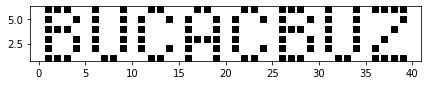

In [ ]:
import matplotlib.axes as ax
import matplotlib.pyplot as plt

plt.scatter(x=X_1, y=Y_1, marker = ',', color = 'black')
plt.rcParams["figure.figsize"] = [7, 1]
plt.show()

--- Day 11: Monkey in the Middle ---

As you finally start making your way upriver, you realize your pack is much lighter than you remember. Just then, one of the items from your pack goes flying overhead. Monkeys are playing Keep Away with your missing things!

To get your stuff back, you need to be able to predict where the monkeys will throw your items. After some careful observation, you realize the monkeys operate based on how worried you are about each item.

You take some notes (your puzzle input) on the items each monkey currently has, how worried you are about those items, and how the monkey makes decisions based on your worry level. For example:

```
Monkey 0:
  Starting items: 79, 98
  Operation: new = old * 19
  Test: divisible by 23
    If true: throw to monkey 2
    If false: throw to monkey 3

Monkey 1:
  Starting items: 54, 65, 75, 74
  Operation: new = old + 6
  Test: divisible by 19
    If true: throw to monkey 2
    If false: throw to monkey 0

Monkey 2:
  Starting items: 79, 60, 97
  Operation: new = old * old
  Test: divisible by 13
    If true: throw to monkey 1
    If false: throw to monkey 3

Monkey 3:
  Starting items: 74
  Operation: new = old + 3
  Test: divisible by 17
    If true: throw to monkey 0
    If false: throw to monkey 1
```

Each monkey has several attributes:

- Starting items lists your worry level for each item the monkey is currently holding in the order they will be inspected.
- Operation shows how your worry level changes as that monkey inspects an item. (An operation like new = old * 5 means that your worry level after the monkey inspected the item is five times whatever your worry level was before inspection.)
- Test shows how the monkey uses your worry level to decide where to throw an item next.
  - If true shows what happens with an item if the Test was true.
  - If false shows what happens with an item if the Test was false.

After each monkey inspects an item but before it tests your worry level, your relief that the monkey's inspection didn't damage the item causes your worry level to be divided by three and rounded down to the nearest integer.

The monkeys take turns inspecting and throwing items. On a single monkey's turn, it inspects and throws all of the items it is holding one at a time and in the order listed. Monkey 0 goes first, then monkey 1, and so on until each monkey has had one turn. The process of each monkey taking a single turn is called a round.

When a monkey throws an item to another monkey, the item goes on the end of the recipient monkey's list. A monkey that starts a round with no items could end up inspecting and throwing many items by the time its turn comes around. If a monkey is holding no items at the start of its turn, its turn ends.

In the above example, the first round proceeds as follows:

```
Monkey 0:
  Monkey inspects an item with a worry level of 79.
    Worry level is multiplied by 19 to 1501.
    Monkey gets bored with item. Worry level is divided by 3 to 500.
    Current worry level is not divisible by 23.
    Item with worry level 500 is thrown to monkey 3.
  Monkey inspects an item with a worry level of 98.
    Worry level is multiplied by 19 to 1862.
    Monkey gets bored with item. Worry level is divided by 3 to 620.
    Current worry level is not divisible by 23.
    Item with worry level 620 is thrown to monkey 3.

Monkey 1:
  Monkey inspects an item with a worry level of 54.
    Worry level increases by 6 to 60.
    Monkey gets bored with item. Worry level is divided by 3 to 20.
    Current worry level is not divisible by 19.
    Item with worry level 20 is thrown to monkey 0.
  Monkey inspects an item with a worry level of 65.
    Worry level increases by 6 to 71.
    Monkey gets bored with item. Worry level is divided by 3 to 23.
    Current worry level is not divisible by 19.
    Item with worry level 23 is thrown to monkey 0.
  Monkey inspects an item with a worry level of 75.
    Worry level increases by 6 to 81.
    Monkey gets bored with item. Worry level is divided by 3 to 27.
    Current worry level is not divisible by 19.
    Item with worry level 27 is thrown to monkey 0.
  Monkey inspects an item with a worry level of 74.
    Worry level increases by 6 to 80.
    Monkey gets bored with item. Worry level is divided by 3 to 26.
    Current worry level is not divisible by 19.
    Item with worry level 26 is thrown to monkey 0.
Monkey 2:
  Monkey inspects an item with a worry level of 79.
    Worry level is multiplied by itself to 6241.
    Monkey gets bored with item. Worry level is divided by 3 to 2080.
    Current worry level is divisible by 13.
    Item with worry level 2080 is thrown to monkey 1.
  Monkey inspects an item with a worry level of 60.
    Worry level is multiplied by itself to 3600.
    Monkey gets bored with item. Worry level is divided by 3 to 1200.
    Current worry level is not divisible by 13.
    Item with worry level 1200 is thrown to monkey 3.
  Monkey inspects an item with a worry level of 97.
    Worry level is multiplied by itself to 9409.
    Monkey gets bored with item. Worry level is divided by 3 to 3136.
    Current worry level is not divisible by 13.
    Item with worry level 3136 is thrown to monkey 3.

Monkey 3:
  Monkey inspects an item with a worry level of 74.
    Worry level increases by 3 to 77.
    Monkey gets bored with item. Worry level is divided by 3 to 25.
    Current worry level is not divisible by 17.
    Item with worry level 25 is thrown to monkey 1.
  Monkey inspects an item with a worry level of 500.
    Worry level increases by 3 to 503.
    Monkey gets bored with item. Worry level is divided by 3 to 167.
    Current worry level is not divisible by 17.
    Item with worry level 167 is thrown to monkey 1.
  Monkey inspects an item with a worry level of 620.
    Worry level increases by 3 to 623.
    Monkey gets bored with item. Worry level is divided by 3 to 207.
    Current worry level is not divisible by 17.
    Item with worry level 207 is thrown to monkey 1.
  Monkey inspects an item with a worry level of 1200.
    Worry level increases by 3 to 1203.
    Monkey gets bored with item. Worry level is divided by 3 to 401.
    Current worry level is not divisible by 17.
    Item with worry level 401 is thrown to monkey 1.
  Monkey inspects an item with a worry level of 3136.
    Worry level increases by 3 to 3139.
    Monkey gets bored with item. Worry level is divided by 3 to 1046.
    Current worry level is not divisible by 17.
    Item with worry level 1046 is thrown to monkey 1.
```

After round 1, the monkeys are holding items with these worry levels:
```
Monkey 0: 20, 23, 27, 26
Monkey 1: 2080, 25, 167, 207, 401, 1046
Monkey 2: 
Monkey 3: 
```

Monkeys 2 and 3 aren't holding any items at the end of the round; they both inspected items during the round and threw them all before the round ended.

This process continues for a few more rounds:

After round 2, the monkeys are holding items with these worry levels:
```
Monkey 0: 695, 10, 71, 135, 350
Monkey 1: 43, 49, 58, 55, 362
Monkey 2: 
Monkey 3: 
```

After round 3, the monkeys are holding items with these worry levels:
```
Monkey 0: 16, 18, 21, 20, 122
Monkey 1: 1468, 22, 150, 286, 739
Monkey 2: 
Monkey 3:
```

After round 4, the monkeys are holding items with these worry levels:
```
Monkey 0: 491, 9, 52, 97, 248, 34
Monkey 1: 39, 45, 43, 258
Monkey 2: 
Monkey 3: 
```

After round 5, the monkeys are holding items with these worry levels:
```
Monkey 0: 15, 17, 16, 88, 1037
Monkey 1: 20, 110, 205, 524, 72
Monkey 2: 
Monkey 3: 
```

After round 6, the monkeys are holding items with these worry levels:
```
Monkey 0: 8, 70, 176, 26, 34
Monkey 1: 481, 32, 36, 186, 2190
Monkey 2: 
Monkey 3: 
```

After round 7, the monkeys are holding items with these worry levels:
```
Monkey 0: 162, 12, 14, 64, 732, 17
Monkey 1: 148, 372, 55, 72
Monkey 2: 
Monkey 3: 
```

After round 8, the monkeys are holding items with these worry levels:
```
Monkey 0: 51, 126, 20, 26, 136
Monkey 1: 343, 26, 30, 1546, 36
Monkey 2: 
Monkey 3: 
```

After round 9, the monkeys are holding items with these worry levels:
```
Monkey 0: 116, 10, 12, 517, 14
Monkey 1: 108, 267, 43, 55, 288
Monkey 2: 
Monkey 3: 
```

After round 10, the monkeys are holding items with these worry levels:
```
Monkey 0: 91, 16, 20, 98
Monkey 1: 481, 245, 22, 26, 1092, 30
Monkey 2: 
Monkey 3: 
```
...

After round 15, the monkeys are holding items with these worry levels:
```
Monkey 0: 83, 44, 8, 184, 9, 20, 26, 102
Monkey 1: 110, 36
Monkey 2: 
Monkey 3: 
```
...

After round 20, the monkeys are holding items with these worry levels:
```
Monkey 0: 10, 12, 14, 26, 34
Monkey 1: 245, 93, 53, 199, 115
Monkey 2: 
Monkey 3: 
```

Chasing all of the monkeys at once is impossible; you're going to have to focus on the two most active monkeys if you want any hope of getting your stuff back. Count the total number of times each monkey inspects items over 20 rounds:

```
Monkey 0 inspected items 101 times.
Monkey 1 inspected items 95 times.
Monkey 2 inspected items 7 times.
Monkey 3 inspected items 105 times.
```

In this example, the two most active monkeys inspected items 101 and 105 times. The level of monkey business in this situation can be found by multiplying these together: 10605.

Figure out which monkeys to chase by counting how many items they inspect over 20 rounds. <p style = 'color:yellow;'>What is the level of monkey business after 20 rounds of stuff-slinging simian shenanigans?</p>

In [ ]:
import copy

with open("day_11.txt") as f:
    lines = f.read().split('\n\n')

In [ ]:
monkeys = []

monkey_lines = [line.split('\n') for line in lines]

for i in monkey_lines:
    items_box = [int(j) for j in i[1].split(': ')[1].split(', ')]
    operation = i[2].split('= ')[1]
    test_oper = int(i[3].split('by ')[1])
    if_true = int(i[4].split('monkey ')[1])
    if_false = int(i[5].split('monkey ')[1])
    
    monkey = {
        'items_box':items_box,
        'operation': operation,
        'test_oper': test_oper,
        'if_true': if_true,
        'if_false': if_false,
        'inspect':0
        }
    monkeys.append(monkey)

In [ ]:
monkeys_for_test = copy.deepcopy(monkeys)
main_div = 3

for i in range(1, 21):
    
    # print('*'*20)
    # print(f'Round: {i}')
    # print('*'*20)
    
    
    for monkey in monkeys_for_test:
        
        # print('Monkey:')
        # print(monkey)
        
        while len(monkey['items_box'])>0:
            curr_item = monkey['items_box'].pop(0)
            # print('------')
            # print(f'curr item: {curr_item}')
            monkey['inspect']+=1
            
            worry_level = eval(monkey['operation'].replace('old', str(curr_item)))//main_div
            
            # print(f'Worry level: {worry_level}')
            
            # print(f"Test oper: {monkey['test_oper']}")
            
            if worry_level % monkey['test_oper'] == 0:
                # print(f"WL % Test oper = {worry_level % monkey['test_oper']}")
                
                to_monkey = monkey['if_true']
                
                # print('True, to monkey: {to_monkey}')
            else:
                to_monkey = monkey['if_false']
                # print('False, to monkey: {to_monkey}')
            
            
            monkeys_for_test[to_monkey]['items_box'].append(worry_level)
            # print(monkeys_for_test[to_monkey]['items_box'])
            
    # print('End round')
    # print(monkeys_for_test)

In [ ]:
from math import prod
insp = sorted([i['inspect'] for i in monkeys_for_test])[::-1]
prod(insp[:2])

120756

In [ ]:
# print([i['test_oper'] for i in monkeys])
# print(prod([i['test_oper'] for i in monkeys]))

--- Part Two ---

You're worried you might not ever get your items back. So worried, in fact, that your relief that a monkey's inspection didn't damage an item no longer causes your worry level to be divided by three.

Unfortunately, that relief was all that was keeping your worry levels from reaching ridiculous levels. You'll need to find another way to keep your worry levels manageable.

At this rate, you might be putting up with these monkeys for a very long time - possibly 10000 rounds!

With these new rules, you can still figure out the monkey business after 10000 rounds. Using the same example above:

```
== After round 1 ==
Monkey 0 inspected items 2 times.
Monkey 1 inspected items 4 times.
Monkey 2 inspected items 3 times.
Monkey 3 inspected items 6 times.

== After round 20 ==
Monkey 0 inspected items 99 times.
Monkey 1 inspected items 97 times.
Monkey 2 inspected items 8 times.
Monkey 3 inspected items 103 times.

== After round 1000 ==
Monkey 0 inspected items 5204 times.
Monkey 1 inspected items 4792 times.
Monkey 2 inspected items 199 times.
Monkey 3 inspected items 5192 times.

== After round 2000 ==
Monkey 0 inspected items 10419 times.
Monkey 1 inspected items 9577 times.
Monkey 2 inspected items 392 times.
Monkey 3 inspected items 10391 times.

== After round 3000 ==
Monkey 0 inspected items 15638 times.
Monkey 1 inspected items 14358 times.
Monkey 2 inspected items 587 times.
Monkey 3 inspected items 15593 times.

== After round 4000 ==
Monkey 0 inspected items 20858 times.
Monkey 1 inspected items 19138 times.
Monkey 2 inspected items 780 times.
Monkey 3 inspected items 20797 times.

== After round 5000 ==
Monkey 0 inspected items 26075 times.
Monkey 1 inspected items 23921 times.
Monkey 2 inspected items 974 times.
Monkey 3 inspected items 26000 times.

== After round 6000 ==
Monkey 0 inspected items 31294 times.
Monkey 1 inspected items 28702 times.
Monkey 2 inspected items 1165 times.
Monkey 3 inspected items 31204 times.

== After round 7000 ==
Monkey 0 inspected items 36508 times.
Monkey 1 inspected items 33488 times.
Monkey 2 inspected items 1360 times.
Monkey 3 inspected items 36400 times.

== After round 8000 ==
Monkey 0 inspected items 41728 times.
Monkey 1 inspected items 38268 times.
Monkey 2 inspected items 1553 times.
Monkey 3 inspected items 41606 times.

== After round 9000 ==
Monkey 0 inspected items 46945 times.
Monkey 1 inspected items 43051 times.
Monkey 2 inspected items 1746 times.
Monkey 3 inspected items 46807 times.

== After round 10000 ==
Monkey 0 inspected items 52166 times.
Monkey 1 inspected items 47830 times.
Monkey 2 inspected items 1938 times.
Monkey 3 inspected items 52013 times.
```

After 10000 rounds, the two most active monkeys inspected items 52166 and 52013 times. Multiplying these together, the level of monkey business in this situation is now 2713310158.

Worry levels are no longer divided by three after each item is inspected; you'll need to find another way to keep your worry levels manageable. <p style = 'color:yellow;'>Starting again from the initial state in your puzzle input, what is the level of monkey business after 10000 rounds?</p>

In [ ]:
monkeys_for_test = copy.deepcopy(monkeys)
main_div = prod([i['test_oper'] for i in monkeys])


for i in range(1, 10001):
    
    for monkey in monkeys_for_test:
        
        while len(monkey['items_box'])>0:
            curr_item = monkey['items_box'].pop(0)
            monkey['inspect']+=1
            
            worry_level = eval(monkey['operation'].replace('old', str(curr_item)))%main_div
                        
            if worry_level % monkey['test_oper'] == 0:
                
                to_monkey = monkey['if_true']

            else:
                to_monkey = monkey['if_false']
            
            monkeys_for_test[to_monkey]['items_box'].append(worry_level)
            
insp = sorted([i['inspect'] for i in monkeys_for_test])[::-1]
prod(insp[:2])

39109444654

--- Day 12: Hill Climbing Algorithm ---

You try contacting the Elves using your handheld device, but the river you're following must be too low to get a decent signal.

You ask the device for a heightmap of the surrounding area (your puzzle input). The heightmap shows the local area from above broken into a grid; the elevation of each square of the grid is given by a single lowercase letter, where a is the lowest elevation, b is the next-lowest, and so on up to the highest elevation, z.

Also included on the heightmap are marks for your current position (S) and the location that should get the best signal (E). Your current position (S) has elevation a, and the location that should get the best signal (E) has elevation z.

You'd like to reach E, but to save energy, you should do it in as few steps as possible. During each step, you can move exactly one square up, down, left, or right. To avoid needing to get out your climbing gear, the elevation of the destination square can be at most one higher than the elevation of your current square; that is, if your current elevation is m, you could step to elevation n, but not to elevation o. (This also means that the elevation of the destination square can be much lower than the elevation of your current square.)

For example:

```
Sabqponm
abcryxxl
accszExk
acctuvwj
abdefghi
```

Here, you start in the top-left corner; your goal is near the middle. You could start by moving down or right, but eventually you'll need to head toward the e at the bottom. From there, you can spiral around to the goal:

```
v..v<<<<
>v.vv<<^
.>vv>E^^
..v>>>^^
..>>>>>^
```

In the above diagram, the symbols indicate whether the path exits each square moving up (^), down (v), left (<), or right (>). The location that should get the best signal is still E, and . marks unvisited squares.

This path reaches the goal in 31 steps, the fewest possible.

What is the fewest steps required to move from your current position to the location that should get the best signal?

In [ ]:
# NETWORKX решение

from networkx import grid_2d_graph
from networkx import shortest_path

with open("day_12.txt") as f:
    grid = [list(x.strip()) for x in f]

source = None
all_sources = []
target = None
for row_n, row in enumerate(grid):
    for col_n, c in enumerate(row):
        if c == "S":
            source = (row_n, col_n)
            grid[row_n][col_n] = "a"
        if c == "E":
            target = (row_n, col_n)
            grid[row_n][col_n] = "z"
        if grid[row_n][col_n] == "a":
            all_sources.append((row_n, col_n))

g = grid_2d_graph(len(grid), len(grid[0]))

grid = [[ord(c)-ord("a") for c in row] for row in grid]


def weight_func(a, b, edge_dict):
    if grid[a[0]][a[1]] < grid[b[0]][b[1]] - 1:
        return None
    return 1

print(len(shortest_path(g, source, target, weight_func))-1)

paths = []
for s in all_sources:
    try:
        paths.append(len(shortest_path(g, s, target, weight_func))-1)
    except:
        pass
print(min(paths))

440
439


In [ ]:
with open("day_12.txt") as f:
    lines = f.readlines()
# lines

In [ ]:
height = []
start = []
end = []

h = {}
i = 0
for c in 'abcdefghijklmnopqrstuvwxyz':
	h[c] = i
	i += 1
h['S'] = 0
h['E'] = h['z']

row = 0
for line in lines:
	col = 0
	r = []
	for c in line.rstrip():
		r.append(h[c])
		if c == 'S':
			start = [row, col]
		elif c == 'E':
			end = [row, col]
		col += 1
	height.append(r)
	row += 1

# print(height)
# print('Start: %s, End: %s' % (start, end))

# Convert height grid into a Graph of possible moves.
# Only N/S/E/W moves are allowed, and only if the destination height
# is <= 1 + source height.

rows = len(height)
cols = len(height[0])
# print('rows = %d, cols = %d' % (rows, cols))
graph = {}

for r in range(0, rows):
	for c in range(0, cols):
		graph[(r,c)] = []
		# North
		if (r-1 >= 0) and (height[r-1][c] <= 1 + height[r][c]):
			graph[(r,c)].append((r-1,c))
		# South
		if (r+1 < rows) and (height[r+1][c] <= 1 + height[r][c]):
			graph[(r,c)].append((r+1,c))
		# West
		if (c-1 >= 0) and (height[r][c-1] <= 1 + height[r][c]):
			graph[(r,c)].append((r,c-1))
		# East
		if (c+1 < cols) and (height[r][c+1] <= 1 + height[r][c]):
			graph[(r,c)].append((r,c+1))
		# print('r=%d, c=%d, graph(r,c)=%s' % (r, c, graph[(r,c)]))

# BFS algorithm
# borrowed from https://favtutor.com/blogs/breadth-first-search-python
# and https://stackabuse.com/courses/graphs-in-python-theory-and-implementation/lessons/breadth-first-search-bfs-algorithm/


def bfs(graph, start, end):
	visited = []
	visited.append(start)
	queue = []
	queue.append(start)
	parent = {}
	parent[start] = None

	found = False
	while queue:
		m = queue.pop(0)
		if m == end:
			found = True
			break

		for neighbor in graph[m]:
			if neighbor not in visited:
				visited.append(neighbor)
				queue.append(neighbor)
				parent[neighbor] = m

	path = []
	if found:
		path.append(end)
		while parent[end] is not None:
			path.append(parent[end])
			end = parent[end]
		path.reverse()
	return path

path = bfs(graph, tuple(start), tuple(end))
print(len(path) - 1)

440


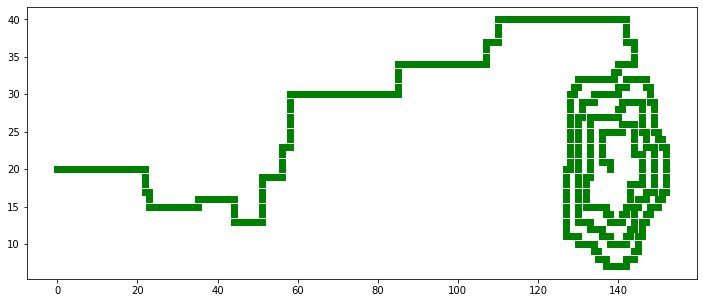

In [ ]:
# import matplotlib.axes as ax
import matplotlib.pyplot as plt

X_1 = []
Y_1 = []


for i in path:
    Y_1.append(i[0])
    X_1.append(i[1])
    

plt.scatter(x=X_1, y=Y_1, marker = ',', color = 'green')
plt.rcParams["figure.figsize"] = [12, 5]
plt.show()

In [ ]:
height = []
start = []
end = []

h = {}
i = 0
for c in 'abcdefghijklmnopqrstuvwxyz':
	h[c] = i
	i += 1
h['S'] = 0
h['E'] = h['z']

row = 0
for line in lines:
	col = 0
	r = []
	for c in line.rstrip():
		r.append(h[c])
		if c == 'S':
			start = (row, col)
		elif c == 'E':
			end = (row, col)
		col += 1
	height.append(r)
	row += 1

# print(height)
# print('Start: %s, End: %s' % (start, end))

# Convert height grid into a Graph of possible moves.
# Only N/S/E/W moves are allowed, and only if the destination height
# is >= source height - 1.  (Reverse of part 1.)

rows = len(height)
cols = len(height[0])
# print('rows = %d, cols = %d' % (rows, cols))
graph = {}

for r in range(0, rows):
	for c in range(0, cols):
		graph[(r,c)] = []
		# North
		if (r-1 >= 0) and (height[r-1][c] >= -1 + height[r][c]):
			graph[(r,c)].append((r-1,c))
		# South
		if (r+1 < rows) and (height[r+1][c] >= -1 + height[r][c]):
			graph[(r,c)].append((r+1,c))
		# West
		if (c-1 >= 0) and (height[r][c-1] >= -1 + height[r][c]):
			graph[(r,c)].append((r,c-1))
		# East
		if (c+1 < cols) and (height[r][c+1] >= -1 + height[r][c]):
			graph[(r,c)].append((r,c+1))
		# print('r=%d, c=%d, graph(r,c)=%s' % (r, c, graph[(r,c)]))

# BFS algorithm
# borrowed from https://favtutor.com/blogs/breadth-first-search-python
# and https://stackabuse.com/courses/graphs-in-python-theory-and-implementation/lessons/breadth-first-search-bfs-algorithm/

# End criteria here is not to reach a specific node, but rather a node
# whose height is 0.

def bfs(graph, start):
	global height
	visited = []
	visited.append(start)
	queue = []
	queue.append(start)
	parent = {}
	parent[start] = None

	found = False
	while queue:
		m = queue.pop(0)
		if height[m[0]][m[1]] == 0:
			found = True
			end = m
			break

		for neighbor in graph[m]:
			if neighbor not in visited:
				visited.append(neighbor)
				queue.append(neighbor)
				parent[neighbor] = m

	path = []
	if found:
		path.append(end)
		while parent[end] is not None:
			path.append(parent[end])
			end = parent[end]
		path.reverse()
	return path

path = bfs(graph, end)
# print(path)
print(len(path) - 1)

439


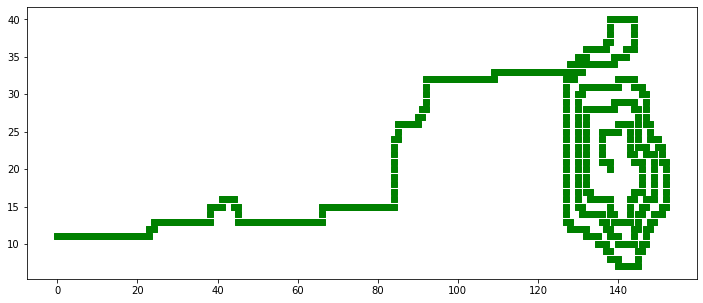

In [ ]:
# import matplotlib.axes as ax
import matplotlib.pyplot as plt

X_1 = []
Y_1 = []


for i in path:
    Y_1.append(i[0])
    X_1.append(i[1])
    

plt.scatter(x=X_1, y=Y_1, marker = ',', color = 'green')
plt.rcParams["figure.figsize"] = [12, 5]
plt.show()

--- Day 13: Distress Signal ---

You climb the hill and again try contacting the Elves. However, you instead receive a signal you weren't expecting: a distress signal.

Your handheld device must still not be working properly; the packets from the distress signal got decoded out of order. You'll need to re-order the list of received packets (your puzzle input) to decode the message.

Your list consists of pairs of packets; pairs are separated by a blank line. You need to identify how many pairs of packets are in the right order.

For example:

```
[1,1,3,1,1]
[1,1,5,1,1]

[[1],[2,3,4]]
[[1],4]

[9]
[[8,7,6]]

[[4,4],4,4]
[[4,4],4,4,4]

[7,7,7,7]
[7,7,7]

[]
[3]

[[[]]]
[[]]

[1,[2,[3,[4,[5,6,7]]]],8,9]
[1,[2,[3,[4,[5,6,0]]]],8,9]
```

Packet data consists of lists and integers. Each list starts with [, ends with ], and contains zero or more comma-separated values (either integers or other lists). Each packet is always a list and appears on its own line.

When comparing two values, the first value is called left and the second value is called right. Then:

If both values are integers, the lower integer should come first. If the left integer is lower than the right integer, the inputs are in the right order. If the left integer is higher than the right integer, the inputs are not in the right order. Otherwise, the inputs are the same integer; continue checking the next part of the input.
If both values are lists, compare the first value of each list, then the second value, and so on. If the left list runs out of items first, the inputs are in the right order. If the right list runs out of items first, the inputs are not in the right order. If the lists are the same length and no comparison makes a decision about the order, continue checking the next part of the input.
If exactly one value is an integer, convert the integer to a list which contains that integer as its only value, then retry the comparison. For example, if comparing [0,0,0] and 2, convert the right value to [2] (a list containing 2); the result is then found by instead comparing [0,0,0] and [2].
Using these rules, you can determine which of the pairs in the example are in the right order:
```
== Pair 1 ==
- Compare [1,1,3,1,1] vs [1,1,5,1,1]
  - Compare 1 vs 1
  - Compare 1 vs 1
  - Compare 3 vs 5
    - Left side is smaller, so inputs are in the right order

== Pair 2 ==
- Compare [[1],[2,3,4]] vs [[1],4]
  - Compare [1] vs [1]
    - Compare 1 vs 1
  - Compare [2,3,4] vs 4
    - Mixed types; convert right to [4] and retry comparison
    - Compare [2,3,4] vs [4]
      - Compare 2 vs 4
        - Left side is smaller, so inputs are in the right order

== Pair 3 ==
- Compare [9] vs [[8,7,6]]
  - Compare 9 vs [8,7,6]
    - Mixed types; convert left to [9] and retry comparison
    - Compare [9] vs [8,7,6]
      - Compare 9 vs 8
        - Right side is smaller, so inputs are not in the right order

== Pair 4 ==
- Compare [[4,4],4,4] vs [[4,4],4,4,4]
  - Compare [4,4] vs [4,4]
    - Compare 4 vs 4
    - Compare 4 vs 4
  - Compare 4 vs 4
  - Compare 4 vs 4
  - Left side ran out of items, so inputs are in the right order

== Pair 5 ==
- Compare [7,7,7,7] vs [7,7,7]
  - Compare 7 vs 7
  - Compare 7 vs 7
  - Compare 7 vs 7
  - Right side ran out of items, so inputs are not in the right order

== Pair 6 ==
- Compare [] vs [3]
  - Left side ran out of items, so inputs are in the right order

== Pair 7 ==
- Compare [[[]]] vs [[]]
  - Compare [[]] vs []
    - Right side ran out of items, so inputs are not in the right order

== Pair 8 ==
- Compare [1,[2,[3,[4,[5,6,7]]]],8,9] vs [1,[2,[3,[4,[5,6,0]]]],8,9]
  - Compare 1 vs 1
  - Compare [2,[3,[4,[5,6,7]]]] vs [2,[3,[4,[5,6,0]]]]
    - Compare 2 vs 2
    - Compare [3,[4,[5,6,7]]] vs [3,[4,[5,6,0]]]
      - Compare 3 vs 3
      - Compare [4,[5,6,7]] vs [4,[5,6,0]]
        - Compare 4 vs 4
        - Compare [5,6,7] vs [5,6,0]
          - Compare 5 vs 5
          - Compare 6 vs 6
          - Compare 7 vs 0
            - Right side is smaller, so inputs are not in the right order
```

What are the indices of the pairs that are already in the right order? (The first pair has index 1, the second pair has index 2, and so on.) In the above example, the pairs in the right order are 1, 2, 4, and 6; the sum of these indices is 13.

Determine which pairs of packets are already in the right order. <p style = 'color:yellow;'>What is the sum of the indices of those pairs?</p>

In [ ]:
with open("day_13.txt") as f:
    lines = f.read().split("\n\n")

In [ ]:
def compare_f(left,right):
    for left_value, right_value in zip(eval(left), eval(right)):
        if type(left_value)==type(right_value)==int:
            if left_value==right_value:
                continue
            return -1 if left_value < right_value else 1
        
        if type(left_value)==list!=type(right_value):
            right_value=[right_value]
        
        if type(left_value)!=list==type(right_value):
            left_value=[left_value]
        recur = compare_f (str(left_value),str(right_value))
        
        if recur!=0:
            return recur
    return -1 if len(left)<len(right) else 1 if len(left)>len(right) else 0

In [ ]:
counter = 0

for ind, line in enumerate(lines):
    first_part, second_part = line.split()
    
    if compare_f(first_part, second_part) !=1:
        counter+= ind+1

counter


4894

--- Part Two ---

Now, you just need to put all of the packets in the right order. Disregard the blank lines in your list of received packets.

The distress signal protocol also requires that you include two additional divider packets:
```
[[2]]
[[6]]
```
Using the same rules as before, organize all packets - the ones in your list of received packets as well as the two divider packets - into the correct order.

For the example above, the result of putting the packets in the correct order is:
```
[]
[[]]
[[[]]]
[1,1,3,1,1]
[1,1,5,1,1]
[[1],[2,3,4]]
[1,[2,[3,[4,[5,6,0]]]],8,9]
[1,[2,[3,[4,[5,6,7]]]],8,9]
[[1],4]
*[[2]]*
[3]
[[4,4],4,4]
[[4,4],4,4,4]
*[[6]]*
[7,7,7]
[7,7,7,7]
[[8,7,6]]
[9]
```
Afterward, locate the divider packets. To find the decoder key for this distress signal, you need to determine the indices of the two divider packets and multiply them together. (The first packet is at index 1, the second packet is at index 2, and so on.) In this example, the divider packets are 10th and 14th, and so the decoder key is 140.

Organize all of the packets into the correct order. What is the decoder key for the distress signal?

In [ ]:
divider_two = '[[2]]'
divider_six = '[[6]]'

ind_two = 1 # счет начинается с 1, двойка может стоять первой
ind_six = 2 # счет начинается с 1, двойка может стоять первой, значит шестерка - минимум второй

for line in lines:
    first_part, second_part = line.split()
    
    # compare [[2]] w/ all left and right parts
    
    # вернем True, если левая часть меньше, чем правая (стоит на месте)
    compare_two_w_left = compare_f(first_part, divider_two)==-1
    compare_two_w_right = compare_f(second_part, divider_two)==-1
    
    # сумма True+False даст единицу
    sum_two = compare_two_w_left+compare_two_w_right
    
    # compare [[6]] w/ all left and right parts
    compare_six_w_left = compare_f(first_part, divider_six)==-1
    compare_six_w_right = compare_f(second_part, divider_six)==-1
    
    sum_six = compare_six_w_left+compare_six_w_right
    
    # увеличим индексы по единице каждый раз, когда сравниваем с парами
    # фактически, мы проверим, сколько раз мы могли бы переставить двойку и шестерку
    ind_two+= sum_two
    ind_six+= sum_six
    
print(ind_two*ind_six)

24180


--- Day 14: Regolith Reservoir ---

The distress signal leads you to a giant waterfall! Actually, hang on - the signal seems like it's coming from the waterfall itself, and that doesn't make any sense. However, you do notice a little path that leads behind the waterfall.

Correction: the distress signal leads you behind a giant waterfall! There seems to be a large cave system here, and the signal definitely leads further inside.

As you begin to make your way deeper underground, you feel the ground rumble for a moment. Sand begins pouring into the cave! If you don't quickly figure out where the sand is going, you could quickly become trapped!

Fortunately, your [familiarity]('https://adventofcode.com/2018/day/17') with analyzing the path of falling material will come in handy here. You scan a two-dimensional vertical slice of the cave above you (your puzzle input) and discover that it is mostly air with structures made of rock.

Your scan traces the path of each solid rock structure and reports the x,y coordinates that form the shape of the path, where x represents distance to the right and y represents distance down. Each path appears as a single line of text in your scan. After the first point of each path, each point indicates the end of a straight horizontal or vertical line to be drawn from the previous point. For example:
```
498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9
```

This scan means that there are two paths of rock; the first path consists of two straight lines, and the second path consists of three straight lines. (Specifically, the first path consists of a line of rock from 498,4 through 498,6 and another line of rock from 498,6 through 496,6.)

The sand is pouring into the cave from point 500,0.

Drawing rock as #, air as ., and the source of the sand as +, this becomes:

```
  4     5  5
  9     0  0
  4     0  3
0 ......+...
1 ..........
2 ..........
3 ..........
4 ....#...##
5 ....#...#.
6 ..###...#.
7 ........#.
8 ........#.
9 #########.
```
Sand is produced one unit at a time, and the next unit of sand is not produced until the previous unit of sand comes to rest. A unit of sand is large enough to fill one tile of air in your scan.

A unit of sand always falls down one step if possible. If the tile immediately below is blocked (by rock or sand), the unit of sand attempts to instead move diagonally one step down and to the left. If that tile is blocked, the unit of sand attempts to instead move diagonally one step down and to the right. Sand keeps moving as long as it is able to do so, at each step trying to move down, then down-left, then down-right. If all three possible destinations are blocked, the unit of sand comes to rest and no longer moves, at which point the next unit of sand is created back at the source.

So, drawing sand that has come to rest as o, the first unit of sand simply falls straight down and then stops:

```
......+...
..........
..........
..........
....#...##
....#...#.
..###...#.
........#.
......o.#.
#########.
```

The second unit of sand then falls straight down, lands on the first one, and then comes to rest to its left:
```
......+...
..........
..........
..........
....#...##
....#...#.
..###...#.
........#.
.....oo.#.
#########.
```

After a total of five units of sand have come to rest, they form this pattern:
```
......+...
..........
..........
..........
....#...##
....#...#.
..###...#.
......o.#.
....oooo#.
#########.
```

After a total of 22 units of sand:
```
......+...
..........
......o...
.....ooo..
....#ooo##
....#ooo#.
..###ooo#.
....oooo#.
...ooooo#.
#########.
```
Finally, only two more units of sand can possibly come to rest:
```
......+...
..........
......o...
.....ooo..
....#ooo##
...o#ooo#.
..###ooo#.
....oooo#.
.o.ooooo#.
#########.
```

Once all 24 units of sand shown above have come to rest, all further sand flows out the bottom, falling into the endless void. Just for fun, the path any new sand takes before falling forever is shown here with ~:
```
.......+...
.......~...
......~o...
.....~ooo..
....~#ooo##
...~o#ooo#.
..~###ooo#.
..~..oooo#.
.~o.ooooo#.
~#########.
~..........
~..........
~..........
```

Using your scan, simulate the falling sand. How many units of sand come to rest before sand starts flowing into the abyss below?

In [ ]:
with open("day_14.txt") as f:
    lines = f.readlines()

In [ ]:
cave_matrix = {}

for line in lines:
    points_list = [x.split(",") for x in line.split("->")]
    points_pairs = [(int(x[0]), int(x[1])) for x in points_list]
    
    for p1, p2 in zip(points_pairs, points_pairs[1:]):
        
        x1, y1 = p1
        x2, y2 = p2
        
        for x in range(min(x1, x2), max(x1, x2) + 1):
            cave_matrix[(x, y1)] = "#"

        for y in range(min(y1, y2), max(y1, y2) + 1):
            cave_matrix[(x1, y)] = "#"

In [ ]:
# cave_matrix

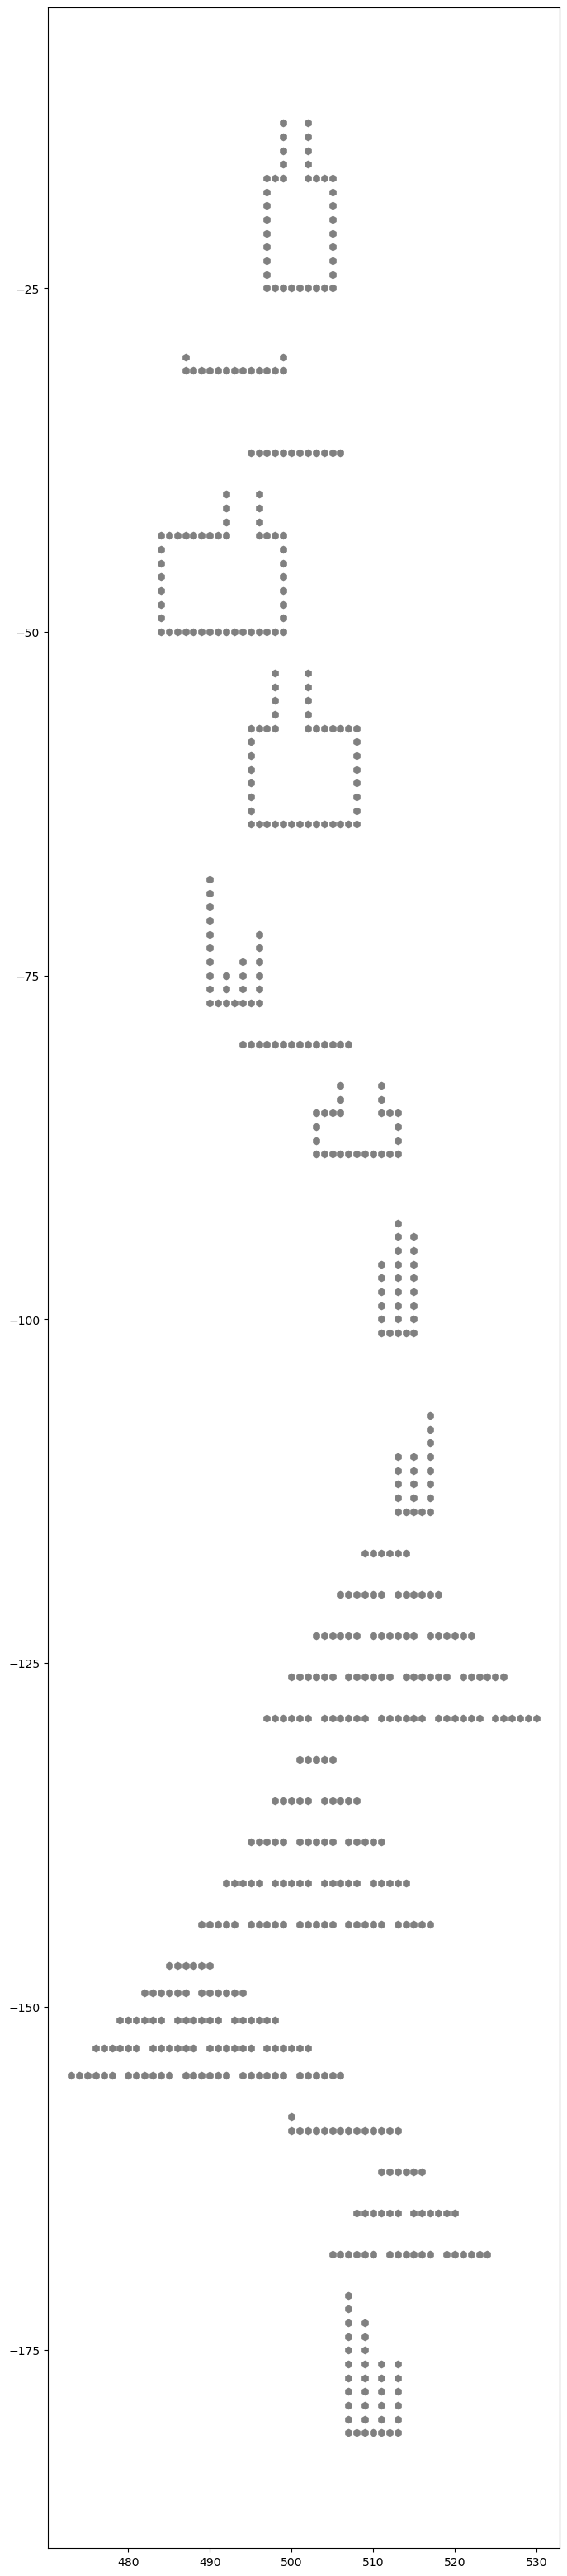

In [ ]:
import matplotlib.pyplot as plt

X_1 = []
Y_1 = []

for i in cave_matrix.keys():
    X_1.append(i[0])
    Y_1.append(-i[1])

plt.scatter(x=X_1, y=Y_1, marker = 'h', color = 'grey')
plt.rcParams["figure.figsize"] = [8, 40]
plt.show()

# песок будет сыпаться от точки (500, 0) снизу вверх
# TODO: надо как-то инвертировать оси

In [ ]:
import copy
cave_matrix_1 = copy.deepcopy(cave_matrix)

In [ ]:

def last_y(cave_matrix = cave_matrix_1):
    return max(y for (_, y) in cave_matrix.keys())

In [ ]:
# TODO: переписать.
# Идея такая: берем столбец (500, 0) и смотрим его вниз не построчно, а сразу вектором.
# как только видим точку (`#`) - проверяем эту линию на предмет наличия трех камней вокруг этой точки. (слайс)
# Дополнительная идея: чтобы проверить "самый верхний камень" в столбце, столбцы нужно сортировать

In [ ]:
# песок сыпется из точки по иксу 500

def sand_fall(cave_matrix = cave_matrix_1):
    x = 500
    
    for y in range(last_y(cave_matrix)):
        # проверяем шаг вниз
        if (x, y + 1) not in cave_matrix:
            continue 
        # вниз влево (от икса отнимаем 1 - перешагиваем в левый столбец)
        elif (x - 1, y + 1) not in cave_matrix:
            x -= 1
        # вниз вправо
        elif (x + 1, y + 1) not in cave_matrix:
            x += 1
        else: 
            # рисуем камень
            cave_matrix[(x, y)] = "o"
            
            # постоянно возвращаем пару (x, y), пока она не будет равна (500, 0) - значит, дошли до точки, из которой песок сыпется
            return (x, y) != (500, 0) 
    return False

In [ ]:
def simulate():
    while sand_fall(cave_matrix):
        pass
    return cave_matrix

In [ ]:
#  получили словарь, в котором значения - это камни и скалы, а ключи - координаты
# посчитаем все камни


p1 = sum(v == "o" for v in simulate().values())
print(p1)


638


--- Part Two ---

You realize you misread the scan. There isn't an endless void at the bottom of the scan - there's floor, and you're standing on it!

You don't have time to scan the floor, so assume the floor is an infinite horizontal line with a y coordinate equal to two plus the highest y coordinate of any point in your scan.

In the example above, the highest y coordinate of any point is 9, and so the floor is at y=11. (This is as if your scan contained one extra rock path like -infinity,11 -> infinity,11.) With the added floor, the example above now looks like this:
```
        ...........+........
        ....................
        ....................
        ....................
        .........#...##.....
        .........#...#......
        .......###...#......
        .............#......
        .............#......
        .....#########......
        ....................
<-- etc #################### etc -->
```

To find somewhere safe to stand, you'll need to simulate falling sand until a unit of sand comes to rest at 500,0, blocking the source entirely and stopping the flow of sand into the cave. In the example above, the situation finally looks like this after 93 units of sand come to rest:

```
............o............
...........ooo...........
..........ooooo..........
.........ooooooo.........
........oo#ooo##o........
.......ooo#ooo#ooo.......
......oo###ooo#oooo......
.....oooo.oooo#ooooo.....
....oooooooooo#oooooo....
...ooo#########ooooooo...
..ooooo.......ooooooooo..
#########################
```

Using your scan, simulate the falling sand until the source of the sand becomes blocked. How many units of sand come to rest?

In [ ]:
cave_matrix_2 = copy.deepcopy(cave_matrix)
# cave_matrix_2

NameError: name 'copy' is not defined

In [ ]:

# сделать пол

def add_bottom_floor(cave_matrix = cave_matrix_2):
    y = last_y(cave_matrix) + 2
    for x in range(-1000, 1001):
        cave_matrix[(x, y)] = "#"

In [ ]:
def simulate_2(cave_matrix = cave_matrix_2):
    add_bottom_floor(cave_matrix)

    while sand_fall(cave_matrix):
        pass 

    return cave_matrix

In [ ]:
# part 2 

p2 = sum(v == "o" for v in simulate_2().values())
print(p2)

31722


--- Day 15: Beacon Exclusion Zone ---

You feel the ground rumble again as the distress signal leads you to a large network of subterranean tunnels. You don't have time to search them all, but you don't need to: your pack contains a set of deployable sensors that you imagine were originally built to locate lost Elves.

The sensors aren't very powerful, but that's okay; your handheld device indicates that you're close enough to the source of the distress signal to use them. You pull the emergency sensor system out of your pack, hit the big button on top, and the sensors zoom off down the tunnels.

Once a sensor finds a spot it thinks will give it a good reading, it attaches itself to a hard surface and begins monitoring for the nearest signal source beacon. Sensors and beacons always exist at integer coordinates. Each sensor knows its own position and can determine the position of a beacon precisely; however, sensors can only lock on to the one beacon closest to the sensor as measured by the Manhattan distance. (There is never a tie where two beacons are the same distance to a sensor.)

It doesn't take long for the sensors to report back their positions and closest beacons (your puzzle input). For example:

```
Sensor at x=2, y=18: closest beacon is at x=-2, y=15
Sensor at x=9, y=16: closest beacon is at x=10, y=16
Sensor at x=13, y=2: closest beacon is at x=15, y=3
Sensor at x=12, y=14: closest beacon is at x=10, y=16
Sensor at x=10, y=20: closest beacon is at x=10, y=16
Sensor at x=14, y=17: closest beacon is at x=10, y=16
Sensor at x=8, y=7: closest beacon is at x=2, y=10
Sensor at x=2, y=0: closest beacon is at x=2, y=10
Sensor at x=0, y=11: closest beacon is at x=2, y=10
Sensor at x=20, y=14: closest beacon is at x=25, y=17
Sensor at x=17, y=20: closest beacon is at x=21, y=22
Sensor at x=16, y=7: closest beacon is at x=15, y=3
Sensor at x=14, y=3: closest beacon is at x=15, y=3
Sensor at x=20, y=1: closest beacon is at x=15, y=3
```

So, consider the sensor at 2,18; the closest beacon to it is at -2,15. For the sensor at 9,16, the closest beacon to it is at 10,16.

Drawing sensors as S and beacons as B, the above arrangement of sensors and beacons looks like this:

```
               1    1    2    2
     0    5    0    5    0    5
 0 ....S.......................
 1 ......................S.....
 2 ...............S............
 3 ................SB..........
 4 ............................
 5 ............................
 6 ............................
 7 ..........S.......S.........
 8 ............................
 9 ............................
10 ....B.......................
11 ..S.........................
12 ............................
13 ............................
14 ..............S.......S.....
15 B...........................
16 ...........SB...............
17 ................S..........B
18 ....S.......................
19 ............................
20 ............S......S........
21 ............................
22 .......................B....
```
This isn't necessarily a comprehensive map of all beacons in the area, though. Because each sensor only identifies its closest beacon, if a sensor detects a beacon, you know there are no other beacons that close or closer to that sensor. There could still be beacons that just happen to not be the closest beacon to any sensor. Consider the sensor at `8,7`:

```
               1    1    2    2
     0    5    0    5    0    5
-2 ..........#.................
-1 .........###................
 0 ....S...#####...............
 1 .......#######........S.....
 2 ......#########S............
 3 .....###########SB..........
 4 ....#############...........
 5 ...###############..........
 6 ..#################.........
 7 .#########S#######S#........
 8 ..#################.........
 9 ...###############..........
10 ....B############...........
11 ..S..###########............
12 ......#########.............
13 .......#######..............
14 ........#####.S.......S.....
15 B........###................
16 ..........#SB...............
17 ................S..........B
18 ....S.......................
19 ............................
20 ............S......S........
21 ............................
22 .......................B....
```

This sensor's closest beacon is at 2,10, and so you know there are no beacons that close or closer (in any positions marked `#`).

None of the detected beacons seem to be producing the distress signal, so you'll need to work out where the distress beacon is by working out where it isn't. For now, keep things simple by counting the positions where a beacon cannot possibly be along just a single row.

So, suppose you have an arrangement of beacons and sensors like in the example above and, just in the row where y=10, you'd like to count the number of positions a beacon cannot possibly exist. The coverage from all sensors near that row looks like this:

```
                 1    1    2    2
       0    5    0    5    0    5
 9 ...#########################...
10 ..####B######################..
11 .###S#############.###########.
```

In this example, in the row where y=10, there are 26 positions where a beacon cannot be present.

Consult the report from the sensors you just deployed. In the row where `y=2000000`, how many positions cannot contain a beacon?

## Идея решения

1. Считаем расстояния между всеми парами
2. Вычисляем минимальное
3. От координаты S в минимальном расстоянии строим две буквы "Г" до строки 200000 и смотрим - какое между ними расстояние (короткая палка от "Г", умноженная на 2)


In [13]:
import re

In [14]:
with open("day_15.txt") as f:
    lines = f.readlines()

In [58]:
target_y = 2000000

sensors = []
beacons = set()
beacons_on_target_y = 0

regex_for_coords = r'Sensor at x=(-?\d+), y=(-?\d+).*beacon is at x=(-?\d+), y=(-?\d+)'


for line in lines:
	result = re.search(regex_for_coords, line)
	sx, sy, bx, by = list(map(int, result.groups()))
	dist = abs(bx-sx) + abs(by-sy)
	sensors.append((sx,sy,dist))
	beacons.add((bx,by))

for b in beacons:
	if b[1] == target_y:
		beacons_on_target_y += 1

# Project each sensor's coverage diamond onto the target row.
# Number of cells covered is either 0, or an odd number (1, 3, 5, ...).
# 
# .................#.....
# ................###.... <= target row
# ........#......#####...
# ..#....###....#######..
# .#S#..##S##..####S####.
# ..#....###....#######..
# ........#......#####...
# ................###....
# .................#.....
# 
# With the sensor 3 units away vertically, range 1 or 2 provides no coverage.
# Range 3 (= dY) provides 1 unit of coverage at sensor's X.
# Range dY+1 provides 3 units of coverage, SX-1 to SX+1.
# Range dY+n provides 2n+1 coverage, from SX-n to SX+n.

coverage = []
for s in sensors:
	sx, sy, s_range = s
	dist = abs(sy - target_y)
	if dist > s_range:
		continue
	coverage.append((sx-(s_range-dist),sx+(s_range-dist)))

# print(coverage)

# Remove redundant coverage elements.
# Use stuff from day 4 part 1.
redundant = [False] * len(coverage)
for i in range(0, len(coverage)-1):
	for j in range(i+1, len(coverage)):
		if i == j:
			continue
		a, b = coverage[i]
		c, d = coverage[j]
		considered = j
		if (a > c) or (a == c and d > b):
			a, b, c, d = c, d, a, b
			considered = i
		if a <= c and b >= d:
			redundant[considered] = True

# print(redundant)
newlist = []
for i in range(0, len(coverage)):
	if not redundant[i]:
		newlist.append(coverage[i])
coverage = newlist

# print(coverage)

# Now see how many tiles of the target Y are covered.
# Start by finding the lowest and highest covered tiles.
xmin, xmax = coverage[0]
for c in coverage:
	if c[0] < xmin:
		xmin = c[0]
	if c[1] > xmax:
		xmax = c[1]

total = 0
for x in range(xmin, xmax+1):
	for c in coverage:
		if x >= c[0] and x <= c[1]:
			total += 1
			break

print(total - beacons_on_target_y)

4919281


--- Part Two ---

Your handheld device indicates that the distress signal is coming from a beacon nearby. The distress beacon is not detected by any sensor, but the distress beacon must have x and y coordinates each no lower than 0 and no larger than 4000000.

To isolate the distress beacon's signal, you need to determine its tuning frequency, which can be found by multiplying its x coordinate by 4000000 and then adding its y coordinate.

In the example above, the search space is smaller: instead, the x and y coordinates can each be at most 20. With this reduced search area, there is only a single position that could have a beacon: x=14, y=11. The tuning frequency for this distress beacon is 56000011.

Find the only possible position for the distress beacon. What is its tuning frequency?

In [60]:
import sys

xy_max = 4000000

# sensors = []

# r = r'Sensor at x=(-?\d+), y=(-?\d+).*beacon is at x=(-?\d+), y=(-?\d+)'
# for line in fileinput.input():
# 	result = re.search(r, line)
# 	sx, sy, bx, by = list(map(int, result.groups()))
# 	dist = abs(bx-sx) + abs(by-sy)
# 	sensors.append((sx,sy,dist))

# Project each sensor's coverage diamond onto the target row.
# Number of cells covered is either 0, or an odd number (1, 3, 5, ...).
# 
# .................#.....
# ................###.... <= target row
# ........#......#####...
# ..#....###....#######..
# .#S#..##S##..####S####.
# ..#....###....#######..
# ........#......#####...
# ................###....
# .................#.....
# 
# With the sensor 3 units away vertically, range 1 or 2 provides no coverage.
# Range 3 (= dY) provides 1 unit of coverage at sensor's X.
# Range dY+1 provides 3 units of coverage, SX-1 to SX+1.
# Range dY+n provides 2n+1 coverage, from SX-n to SX+n.


def get_coverage(sensors, target_y):
	coverage = []
	for s in sensors:
		sx, sy, s_range = s
		dist = abs(sy - target_y)
		if dist > s_range:
			continue
		coverage.append((sx-(s_range-dist),sx+(s_range-dist)))


	# Remove redundant coverage elements.
	# Use stuff from day 4 part 1.
	redundant = [False] * len(coverage)
	for i in range(0, len(coverage)-1):
		for j in range(i+1, len(coverage)):
			if i == j:
				continue
			a, b = coverage[i]
			c, d = coverage[j]
			considered = j
			if (a > c) or (a == c and d > b):
				a, b, c, d = c, d, a, b
				considered = i
			if a <= c and b >= d:
				redundant[considered] = True

	newlist = []
	for i in range(0, len(coverage)):
		if not redundant[i]:
			newlist.append(coverage[i])
	return newlist

for y in range(0, xy_max+1):
	# Look for a coverage gap.
	# If there's a gap, it'll be right before or right after a
	# coverage zone.
	coverage = get_coverage(sensors, y)
	check = set()
	for c in coverage:
		if c[0]-1 >= 0 and c[0]-1 <= xy_max:
			check.add(c[0]-1)
		if c[1]+1 >= 0 and c[1]+1 <= xy_max:
			check.add(c[1]+1)

	for x in check:
		covered = False
		for c in coverage:
			if x >= c[0] and x <= c[1]:
				covered = True
		if not covered:
			print("x=%d, y=%d is not covered" % (x,y))
			print(x*4000000 + y)
			sys.exit(0)

x=3157535, y=3363767 is not covered
12630143363767


SystemExit: 0

/opt/homebrew/Caskroom/miniforge/base/envs/study_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [61]:
# TODO: сделать визуализацию 15 дня

--- Day 16: Proboscidea Volcanium ---

The sensors have led you to the origin of the distress signal: yet another handheld device, just like the one the Elves gave you. However, you don't see any Elves around; instead, the device is surrounded by elephants! They must have gotten lost in these tunnels, and one of the elephants apparently figured out how to turn on the distress signal.

The ground rumbles again, much stronger this time. What kind of cave is this, exactly? You scan the cave with your handheld device; it reports mostly igneous rock, some ash, pockets of pressurized gas, magma... this isn't just a cave, it's a volcano!

You need to get the elephants out of here, quickly. Your device estimates that you have 30 minutes before the volcano erupts, so you don't have time to go back out the way you came in.

You scan the cave for other options and discover a network of pipes and pressure-release valves. You aren't sure how such a system got into a volcano, but you don't have time to complain; your device produces a report (your puzzle input) of each valve's flow rate if it were opened (in pressure per minute) and the tunnels you could use to move between the valves.

There's even a valve in the room you and the elephants are currently standing in labeled AA. You estimate it will take you one minute to open a single valve and one minute to follow any tunnel from one valve to another. What is the most pressure you could release?

For example, suppose you had the following scan output:

```
Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II
```

All of the valves begin closed. You start at valve AA, but it must be damaged or jammed or something: its flow rate is 0, so there's no point in opening it. However, you could spend one minute moving to valve BB and another minute opening it; doing so would release pressure during the remaining 28 minutes at a flow rate of 13, a total eventual pressure release of 28 * 13 = 364. Then, you could spend your third minute moving to valve CC and your fourth minute opening it, providing an additional 26 minutes of eventual pressure release at a flow rate of 2, or 52 total pressure released by valve CC.

Making your way through the tunnels like this, you could probably open many or all of the valves by the time 30 minutes have elapsed. However, you need to release as much pressure as possible, so you'll need to be methodical. Instead, consider this approach:

```
== Minute 1 ==
No valves are open.
You move to valve DD.

== Minute 2 ==
No valves are open.
You open valve DD.

== Minute 3 ==
Valve DD is open, releasing 20 pressure.
You move to valve CC.

== Minute 4 ==
Valve DD is open, releasing 20 pressure.
You move to valve BB.

== Minute 5 ==
Valve DD is open, releasing 20 pressure.
You open valve BB.

== Minute 6 ==
Valves BB and DD are open, releasing 33 pressure.
You move to valve AA.

== Minute 7 ==
Valves BB and DD are open, releasing 33 pressure.
You move to valve II.

== Minute 8 ==
Valves BB and DD are open, releasing 33 pressure.
You move to valve JJ.

== Minute 9 ==
Valves BB and DD are open, releasing 33 pressure.
You open valve JJ.

== Minute 10 ==
Valves BB, DD, and JJ are open, releasing 54 pressure.
You move to valve II.

== Minute 11 ==
Valves BB, DD, and JJ are open, releasing 54 pressure.
You move to valve AA.

== Minute 12 ==
Valves BB, DD, and JJ are open, releasing 54 pressure.
You move to valve DD.

== Minute 13 ==
Valves BB, DD, and JJ are open, releasing 54 pressure.
You move to valve EE.

== Minute 14 ==
Valves BB, DD, and JJ are open, releasing 54 pressure.
You move to valve FF.

== Minute 15 ==
Valves BB, DD, and JJ are open, releasing 54 pressure.
You move to valve GG.

== Minute 16 ==
Valves BB, DD, and JJ are open, releasing 54 pressure.
You move to valve HH.

== Minute 17 ==
Valves BB, DD, and JJ are open, releasing 54 pressure.
You open valve HH.

== Minute 18 ==
Valves BB, DD, HH, and JJ are open, releasing 76 pressure.
You move to valve GG.

== Minute 19 ==
Valves BB, DD, HH, and JJ are open, releasing 76 pressure.
You move to valve FF.

== Minute 20 ==
Valves BB, DD, HH, and JJ are open, releasing 76 pressure.
You move to valve EE.

== Minute 21 ==
Valves BB, DD, HH, and JJ are open, releasing 76 pressure.
You open valve EE.

== Minute 22 ==
Valves BB, DD, EE, HH, and JJ are open, releasing 79 pressure.
You move to valve DD.

== Minute 23 ==
Valves BB, DD, EE, HH, and JJ are open, releasing 79 pressure.
You move to valve CC.

== Minute 24 ==
Valves BB, DD, EE, HH, and JJ are open, releasing 79 pressure.
You open valve CC.

== Minute 25 ==
Valves BB, CC, DD, EE, HH, and JJ are open, releasing 81 pressure.

== Minute 26 ==
Valves BB, CC, DD, EE, HH, and JJ are open, releasing 81 pressure.

== Minute 27 ==
Valves BB, CC, DD, EE, HH, and JJ are open, releasing 81 pressure.

== Minute 28 ==
Valves BB, CC, DD, EE, HH, and JJ are open, releasing 81 pressure.

== Minute 29 ==
Valves BB, CC, DD, EE, HH, and JJ are open, releasing 81 pressure.

== Minute 30 ==
Valves BB, CC, DD, EE, HH, and JJ are open, releasing 81 pressure.
```

This approach lets you release the most pressure possible in 30 minutes with this valve layout, 1651.

Work out the steps to release the most pressure in 30 minutes. What is the most pressure you can release?

In [65]:
import re
import networkx as nx

In [66]:
with open("day_16_test.txt") as f:
    lines = [line.strip() for line in f.readlines()]

In [67]:
regex_for_valves = r"Valve ([A-Z]{2}) has flow rate=(\d*?); tunnel[s]? lead[s]? to valve[s]? (.+?)$"

In [68]:
valve_value = {}
graph_dict = {}

for line in lines:    
    result = re.search(regex_for_valves, line)
    valve_tmp, valve_rate_tmp, lead_to = result.groups()
    lead_to_l = [x.strip() for x in lead_to.split(',')]
    valve_value[valve_tmp] = int(valve_rate_tmp)
    graph_dict[valve_tmp] = tuple(lead_to_l)

In [69]:
graph_pairs_one_to_one = []

In [70]:
for i,x in graph_dict.items():
    for j in x:
        graph_pairs_one_to_one.append((i, j))
        
        # graph_dict_one_to_one[i]=j
        # reversed_graph_dict_one_to_one[j]=i

In [71]:
# valve_value

In [72]:
g = nx.Graph()

In [73]:
attrs = {}


for i,x in valve_value.items():
    g.add_node(i)
    attrs[i] = {'valve':x}


nx.set_node_attributes(g, attrs)

In [74]:
for i in graph_pairs_one_to_one:
    # print(i)
    g.add_edge(i[0], i[1])

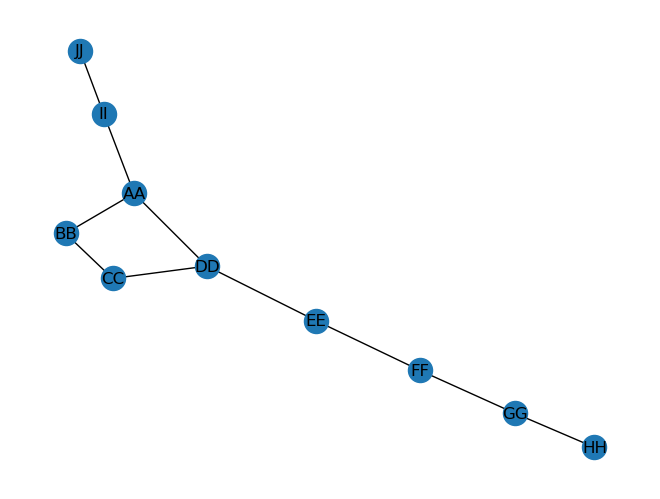

In [75]:
nx.draw(g, with_labels = True)

In [76]:
def find_neighbors(key_value, list_values = graph_pairs_one_to_one):
    tmp = []
    for i in list_values:
        if key_value == i[0]:
            tmp.append((key_value, i))
    return tmp
    

In [77]:
find_neighbors('AA')


# for i,x in valve_value.items():
#     if x==0:
        

[('AA', ('AA', 'DD')), ('AA', ('AA', 'II')), ('AA', ('AA', 'BB'))]

In [54]:
# for x,i in valve_value.items():
#     if i==0:
#         print(f'from {x}')
#         print(f"to {graph_dict[x]}")

In [55]:
with open("day_16.txt") as f:
    lines = [line.strip() for line in f.readlines()]

In [56]:
import re
import networkx as nx

In [57]:
regex_for_valves = r"Valve ([A-Z]{2}) has flow rate=(\d*?); tunnel[s]? lead[s]? to valve[s]? (.+?)$"

In [58]:
valve_value = {}
graph_dict = {}

for line in lines:    
    result = re.search(regex_for_valves, line)
    valve_tmp, valve_rate_tmp, lead_to = result.groups()
    lead_to_l = [x.strip() for x in lead_to.split(',')]
    valve_value[valve_tmp] = int(valve_rate_tmp)
    graph_dict[valve_tmp] = tuple(lead_to_l)

In [59]:
# graph_dict
# valve_value

G = nx.Graph()

In [60]:
# type(valve_value)

In [61]:
for i in valve_value.keys():
    G.add_node(i)

In [62]:
nx.set_node_attributes(G, valve_value, name = "node_weight")

In [63]:
for i in graph_dict.keys():
    for x in graph_dict[i]:
        G.add_edge(i, x)

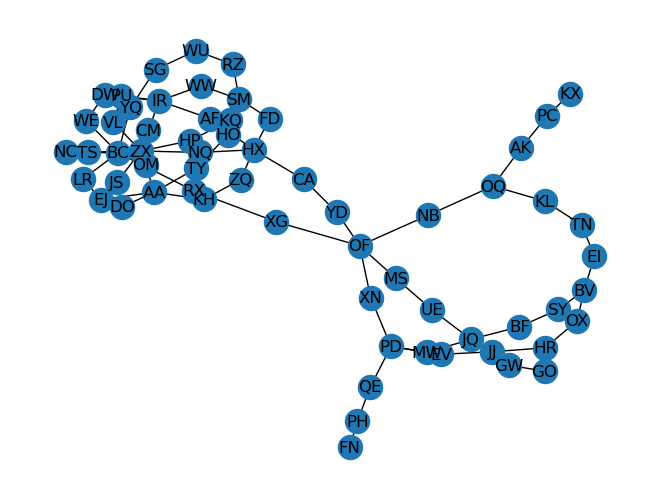

In [64]:
nx.draw(G, with_labels = True)